# Loading and Analysig Cluster Simulation Data

### Defining some helper functions to load and collect the data in a nice format

In [1]:
import pickle

def load_simulation_dictionaries(simulation_data_names_file):

    # simulation_data_directory = 'Cluster_Results/AD_Results'

    # simulaiton_data_names_file = '4qubits00field.txt'

    # simulation_data_paths = simulation_data_directory + '/' + simulation_data_names_file

    simulation_data_paths = simulation_data_names_file

    # Open the file in read mode
    with open(simulation_data_paths, 'r') as file:
        # Read the contents of the file
        simualtion_data_files = file.read().splitlines()

    # Print the file contents

    trials = len(simualtion_data_files)

    # print(f'Total number of simulations: {trials}')

    simulation_dictionaries = []

    for file_path in simualtion_data_files:

        with open(file_path, 'rb') as file:
            # Load the dictionary from the pickle file
            dictionary = pickle.load(file)
            simulation_dictionaries.append(dictionary)

        # print(f'{file_path} succesfully loaded into dictionary!')
    
    print(f'    Succesfully loaded {trials} simulations!')

    return simulation_dictionaries
        

In [2]:
# Sorting the simulations results
import numpy as np

def sort_simulation_dictionaries(simulation_dictionaries):

    simulation_dictionaries = np.asarray(simulation_dictionaries)

    final_energies = []

    for simulation_data in simulation_dictionaries:

        final_energy = simulation_data['simulation_results']['energy_trajectory'][-1]
        final_energies.append(final_energy)
        # print(final_energy)

    final_energies = np.asarray(final_energies)

    # print(final_energies)

    sorted_indices = np.argsort(final_energies)

    # print(sorted_indices)
    # print(final_energies[sorted_indices])

    sorted_simulation_dictionaries = simulation_dictionaries[sorted_indices]
    # print(sorted_simulation_dictionaries)

    return sorted_simulation_dictionaries



In [8]:

def collect_simulation_dictionaries(sorted_simulation_dictionaries):

    example_dictionary = sorted_simulation_dictionaries[0]

    trials = len(sorted_simulation_dictionaries)

    n_qubits = example_dictionary['qubits']
    epochs = example_dictionary['epochs']
    transverse_field_coefficient = example_dictionary['transverse_field_coefficient']
    # times = example_dictionary['times']
    # method = example_dictionary['method']
    # loss_hamiltonian = example_dictionary['loss_hamiltonian']
    # loss_hamiltonian_spectrum = example_dictionary['loss_hamiltonian_spectrum'].eigenvalues.detach().numpy()
    learning_rate = example_dictionary['learning_rates']
    # parameters_shape = example_dictionary['parameters_shape']

    # simulation_results = example_dictionary['simulation_results']
    # # print(simulation_results.keys())
    # cost_trajectory = simulation_results['cost_trajectory']
    # parameters_trajectory = simulation_results['parameters_trajectory']
    # final_gradient = simulation_results['final_gradient']
    # print(simulation_results['final_hessian'].keys())
    # final_hessian = simulation_results['final_hessian']['hessian_matrix']
    # final_hessian_determinant = simulation_results['final_hessian']['determinant']
    # final_hessian_eigenvalues = simulation_results['final_hessian']['eigenvalues']
    # final_hessian_min_eigval = simulation_results['final_hessian']['min_eigval']
    # final_hessian_max_eigval = simulation_results['final_hessian']['max_eigval']
    # final_hessian_minmax_ratio = simulation_results['final_hessian']['minmax_ratio']
    # print(simulation_results['cost_trajectory'])
    # print(final_cost)
    # print(simulation_results['final_hessian'])

        
    all_parameters_trajectories = []
    all_costs_trajectories = []
    all_final_parameters = []
    all_final_gradients = []
    all_final_hessians = []
    all_final_hessian_determinants = []
    all_final_hessians_eigenvalues = []
    hessian_min_eigenvalues = [] 
    hessian_max_eigenvalues = []
    hessian_eigenvalues_ratio = []




    for simulation_dictionary in sorted_simulation_dictionaries:
        
        simulation_results = simulation_dictionary['simulation_results']

        # print(simulation_results.keys())

        cost_trajectory = simulation_results['energy_trajectory']
        parameters_trajectory = simulation_results['parameters_trajectory']
        final_parameters = parameters_trajectory[-1]
        mean_gradients = simulation_results['gradient_trajectory']
        final_gradient = mean_gradients[-1]
        # print(simulation_results['final_hessian'].keys())
        final_hessian = simulation_results['final_hessian']['hessian_matrix']
        # final_hessian_determinant = simulation_results['final_hessian']['determinant'].detach().numpy()
        final_hessian_eigenvalues = simulation_results['final_hessian']['eigenvalues']
        final_hessian_min_eigval = simulation_results['final_hessian']['min_eigval']
        final_hessian_max_eigval = simulation_results['final_hessian']['max_eigval']
        final_hessian_minmax_ratio = simulation_results['final_hessian']['minmax_ratio']

        all_parameters_trajectories.append(parameters_trajectory)
        all_costs_trajectories.append(cost_trajectory)
        all_final_parameters.append(final_parameters)
        all_final_gradients.append(final_gradient)
        all_final_hessians.append(final_hessian)
        # all_final_hessian_determinants.append(final_hessian_determinant)
        all_final_hessians_eigenvalues.append(final_hessian_eigenvalues)
        hessian_min_eigenvalues.append(final_hessian_min_eigval)
        hessian_max_eigenvalues.append(final_hessian_max_eigval)
        hessian_eigenvalues_ratio.append(final_hessian_minmax_ratio)


    all_parameters_trajectories = np.asarray(all_parameters_trajectories)
    all_costs_trajectories = np.asarray(all_costs_trajectories)
    all_final_parameters = np.asarray(all_final_parameters)
    all_final_gradients = np.asarray(all_final_gradients)
    all_final_hessians = np.asarray(all_final_hessians)
    all_final_hessian_determinants = np.asarray(all_final_hessian_determinants)
    all_final_hessians_eigenvalues = np.asarray(all_final_hessians_eigenvalues)
    hessian_min_eigenvalues = np.asarray(hessian_min_eigenvalues)
    hessian_max_eigenvalues = np.asarray(hessian_max_eigenvalues)
    hessian_eigenvalues_ratio = np.asarray(hessian_eigenvalues_ratio)


    formatted_simulation_data =  {
        'qubits': n_qubits,
        'transverse_field_coefficient': transverse_field_coefficient,
        'epochs': epochs,
        'learning_rate': learning_rate,
        'trials': trials,
        'simulation_results': {
            'all_parameters_trajectories': all_parameters_trajectories,
            'all_costs_trajectories': all_costs_trajectories,
            'all_final_parameters': all_final_parameters,
            'all_final_gradients': all_final_gradients,
            'all_final_hessians': all_final_hessians,
            'all_final_hessian_determinants': all_final_hessian_determinants,
            'all_final_hessians_eigenvalues': all_final_hessians_eigenvalues,
            'hessian_min_eigenvalues': hessian_min_eigenvalues,
            'hessian_max_eigenvalues': hessian_max_eigenvalues,
            'hessian_eigenvalues_ratio':hessian_eigenvalues_ratio
        }
    }

    return formatted_simulation_data


## Loading the data

The formnatted simulation dictionaries are stored in a list 

In [9]:


simulation_data_names_files = ['8qubits01field.txt']

# simulation_data_names_file = '4qubits00field.txt'

vqe_problems = []

for simulation_data_names_file in simulation_data_names_files:

    print(f'Loading {simulation_data_names_file} data')

    simulation_dictionaries = load_simulation_dictionaries(simulation_data_names_file)

    sorted_simulation_dictionaries = sort_simulation_dictionaries(simulation_dictionaries)

    formatted_simulation_data = collect_simulation_dictionaries(sorted_simulation_dictionaries)

    vqe_problems.append(formatted_simulation_data)
    # print(formatted_simulation_data)

# print(vqe_problems)
    

Loading 8qubits01field.txt data
    Succesfully loaded 200 simulations!


## Creating the folders to store the figures generated with ORQVIZ

First, we define a function to create a folder at a given path and then we create the folder in which to store the results for the specific loss hamiltonian

In [10]:
from os import mkdir
from os.path import exists


def create_folder(path):

  if not exists(path):
    mkdir(path)

    print("Folder %s created!" % path)
  else:
    print("Folder %s already exists" % path)


In [11]:
GLOBAL_PATH = ''

hamiltonian_path = '1D Ising Model Figures/'

results_path = GLOBAL_PATH + hamiltonian_path

create_folder(results_path)

Folder 1D Ising Model Figures/ created!


# Visualizing Results with ORQVIZ

In [12]:
import numpy as np
import matplotlib.pyplot as plt

loss_limits = (-0.1, 1.3)

title_fontsize = 25
label_fontsize = 25 
tick_fontsize = 20
colorbar_fontsize = 20
legend_fontsize = 20

## Training Progress Histograms

In [15]:
def make_training_loss_plot(problem, ax):

    # vqe_problem = setup_vqe_problem(problem)

    simulation_results = problem['simulation_results']
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    epochs = problem['epochs']
    trials = problem['trials']
    # gs_energy = np.amin(problem['loss_hamiltonian_spectrum'])
    gs_energy = -7.025018814832985
    all_costs_trajectories = simulation_results['all_costs_trajectories']

    # fig, ax = plt.subplots()

    ax.plot(all_costs_trajectories.T, linewidth=2.5, color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

    ax.set_title(f"Training Progress of {trials} Trials for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)
    ax.set_ylabel("Loss", fontsize=label_fontsize)
    ax.set_xlabel("Training Iterations", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)
    # plt.ylim(loss_limits)
    ax.plot(range(len(all_costs_trajectories[0])), [gs_energy]*len(all_costs_trajectories[0]), linestyle="dashed", color="black", label="True Ground State")
    ax.scatter([epochs, epochs, epochs], all_costs_trajectories[[0, 1, -1],-1], color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)
    # plt.annotate("gr", xy=(epochs-10,0))

    ax.legend()

Folder 1D Ising Model Figures/8 qubits/ already exists
CPU times: user 1.99 s, sys: 41.4 ms, total: 2.03 s
Wall time: 880 ms


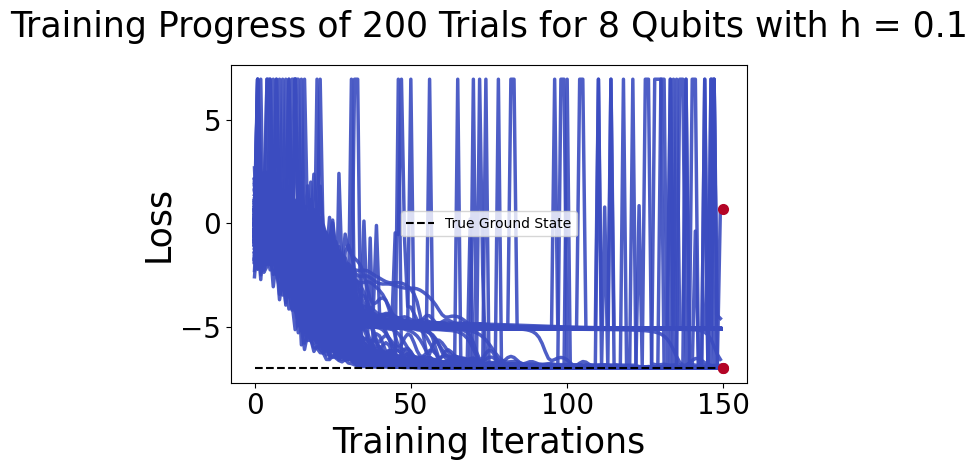

In [16]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']
    # depth = problem['depth']
    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'training_progress_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_training_loss_plot(problem, ax)

    plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()


## Final Losses Histograms

In [19]:

def make_final_losses_histogram(problem, ax, show_spectrum = False):

    simulation_results = problem["simulation_results"]
    n_qubits = problem["qubits"]
    transverse_field_coefficient = problem["transverse_field_coefficient"]
    # epochs = problem["epochs"]
    trials = problem["trials"]
    # loss_hamiltonian_spectrum = problem["loss_hamiltonian_spectrum"]

    all_costs_trajectories = simulation_results["all_costs_trajectories"]

    # fig, ax = plt.subplots()

    ax.hist(all_costs_trajectories[:,-1], bins=100, width=0.1, align="mid", color='tomato', alpha=0.9)
    ax.set_title(f"Histogram of {trials} final losses with h = {transverse_field_coefficient}\n({n_qubits}-qubit Analog VQE)", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Loss", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)


    # if show_spectrum:
    #     spectrum_lines = np.unique(loss_hamiltonian_spectrum)
    #     for state in range(len(spectrum_lines)):

    #         line = spectrum_lines[state]

    #         if state == 0:
    #             # label = 'Ground State'
    #             label = 'Hamiltonian Spectrum'
    #         else:
    #             # label = f"{state} Excited State"
    #             label = ''

    #         ax.axvline(x = line, color = 'black', label = label, linestyle = ':', linewidth=1)

    # ax.set_xlim(right=0)

    ax.legend(loc='upper right')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Folder 1D Ising Model Figures/8 qubits/ already exists
CPU times: user 330 ms, sys: 12.7 ms, total: 343 ms
Wall time: 158 ms


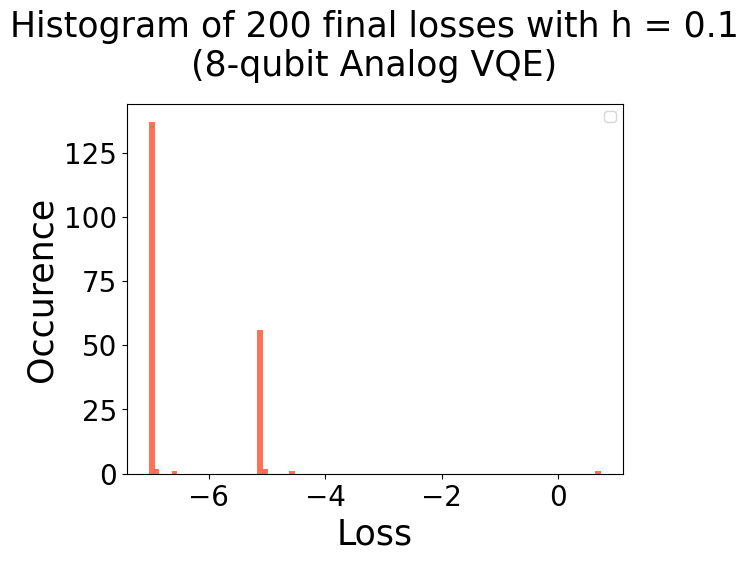

In [20]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'final_losses_histograms_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_final_losses_histogram(problem, ax, True)

    # plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()


## Gradient Inspection

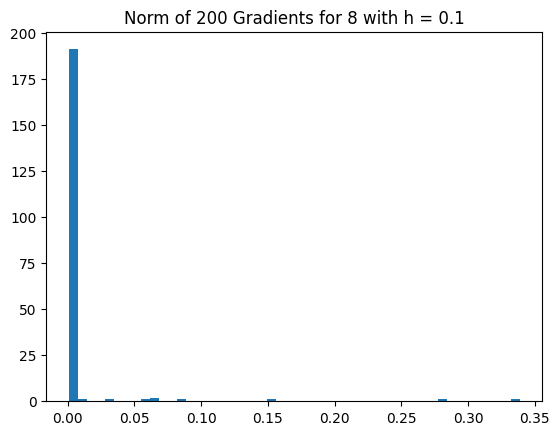

In [23]:

for problem in vqe_problems:

    all_final_gradients = problem['simulation_results']['all_final_gradients']
    # all_final_gradients = [torch.cat((gradient['Js'].view(-1), gradient['vs'].view(-1))).detach().numpy() for gradient in all_final_gradients]
    # print(all_final_gradients)
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    trials = problem['trials']

    # gradient_norms = np.linalg.norm(all_final_gradients, axis = 1)

    # print(gradient_norms)
    plt.title(f'Norm of {trials} Gradients for {n_qubits} with h = {transverse_field_coefficient}')
    plt.hist(all_final_gradients, bins=50, )
    # plt.xscale('log')
    plt.show()


## Hessian Analysis

### Inspecting the eigenvalues

In [25]:
for problem in vqe_problems:

    np.set_printoptions(linewidth=np.inf)

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}')

    simulation_results = problem['simulation_results']

    # gs_energy = problem['loss_hamiltonian_spectrum'][0]
    gs_energy = -7.025018814832985

    hessians = simulation_results['all_final_hessians']
    # hessian_determinants = simulation_results['all_final_hessian_determinants']

    all_final_costs = simulation_results['all_costs_trajectories'][:,-1]


    for trial_count in range(len(all_final_costs)):

        hessian = hessians[trial_count]
        # determinant = hessian_determinants[trial_count]
        final_loss = all_final_costs[trial_count]

        # 'all_final_hessian_determinants': all_final_hessian_determinants,
        #     'all_final_hessians_eigenvalues': all_final_hessians_eigenvalues,
        #     'hessian_min_eigenvalues': hessian_min_eigenvalues,
        #     'hessian_max_eigenvalues': hessian_max_eigenvalues,
        #     'hessian_eigenvalues_ratio

        min_eigval = simulation_results['hessian_min_eigenvalues'][trial_count]

        max_eigval = simulation_results['hessian_max_eigenvalues'][trial_count]
        ratio = simulation_results['hessian_eigenvalues_ratio'][trial_count]

        print(f'Final loss: {final_loss} | True ground state: {gs_energy}')
        print(f'Hessian information: ')
        print(f'        Eigenvalue ratio: {ratio} | Minimum eigenvalue: {min_eigval} | Maximum eigenvalue: {max_eigval}')
        # print(f'        Determinant: {determinant}')

        # trial_count += 1


8 Qubits with h = 0.1
Final loss: -7.024512285179959 | True ground state: -7.025018814832985
Hessian information: 
        Eigenvalue ratio: (-4.427319800015539e-05+0j) | Minimum eigenvalue: (-0.0010619540698826313+0j) | Maximum eigenvalue: (23.986387252807617+0j)
Final loss: -7.024356116959751 | True ground state: -7.025018814832985
Hessian information: 
        Eigenvalue ratio: (-0.00011984926095465198+0j) | Minimum eigenvalue: (-0.0027913146186619997+0j) | Maximum eigenvalue: (23.290210723876953+0j)
Final loss: -7.024269289004425 | True ground state: -7.025018814832985
Hessian information: 
        Eigenvalue ratio: (-0.0001302454766118899+0j) | Minimum eigenvalue: (-0.002599073341116309+0j) | Maximum eigenvalue: (19.955190658569336+0j)
Final loss: -7.024212177159402 | True ground state: -7.025018814832985
Hessian information: 
        Eigenvalue ratio: (-0.00021611338888760656+0j) | Minimum eigenvalue: (-0.0051731630228459835+0j) | Maximum eigenvalue: (23.937265396118164+0j)
Final

In [26]:
def make_minmax_eigval_plot(problem, ax):
    
    simulation_results = problem['simulation_results']
    n_qubits = problem['qubits']
    transverse_field_coefficient = problem['transverse_field_coefficient']
    epochs = problem['epochs']
    trials = problem['trials']
    # gs_energy = np.amin(problem['loss_hamiltonian_spectrum'])
    gs_energy = -7.025018814832985

    all_costs_trajectories = simulation_results['all_costs_trajectories']

    # fig, ax = plt.subplots()

    eigvals_min = simulation_results['hessian_min_eigenvalues']
    eigvals_max = simulation_results['hessian_max_eigenvalues']
    trial_marks = [i+1 for i in range(len(eigvals_min))]

    ax.set_title(f"Hessian eigenvalues of {trials} trials with h = {transverse_field_coefficient}\n({n_qubits}-qubit Analog VQE)", fontsize=title_fontsize*1, pad=20)
    ax.set_ylabel("Eigenvalues", fontsize=label_fontsize)
    ax.set_xlabel("Trial", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)
    # plt.ylim(loss_limits)
    # ax.plot(range(len(all_costs_trajectories[0])), [gs_energy]*len(all_costs_trajectories[0]), linestyle="dashed", color="black", label="Exact Solution")
    # ax.scatter(trial_marks, eigvals_min, color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)
    # ax.scatter(trial_marks, eigvals_max, color=plt.get_cmap("coolwarm", 7)(6), linewidth=2, zorder=3)

    ax.scatter(trial_marks, eigvals_min, c = 'skyblue', label = 'minimum eigenvalues')
    ax.scatter(trial_marks, eigvals_max, c = [(240/255, 197/255, 105/255)], label = 'maximum eigenvalues')

    # plt.annotate("gr", xy=(epochs-10,0))

    ax.legend()

Folder 1D Ising Model Figures/8 qubits/ already exists
CPU times: user 267 ms, sys: 15.3 ms, total: 283 ms
Wall time: 115 ms


/Users/jorgegarciaponce/Research/Yelin/PerceptronLossLandscapes/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jorgegarciaponce/Research/Yelin/PerceptronLossLandscapes/.venv/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


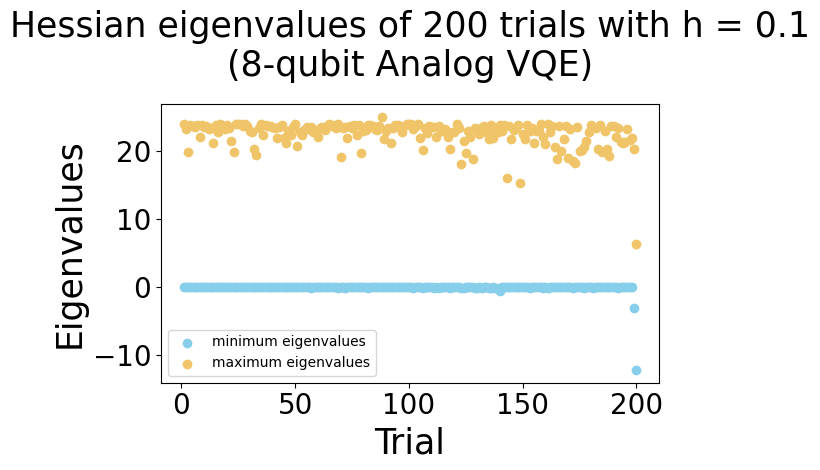

In [27]:
%%time

for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    qubits_folder = results_path + f'{n_qubits} qubits/'

    create_folder(qubits_folder)

    filename = qubits_folder + f'minmax_hessian_eigenvalues_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    fig, ax = plt.subplots()

    make_minmax_eigval_plot(problem, ax)

    plt.tight_layout()

    plt.savefig(filename, bbox_inches="tight")
    # plt.show()

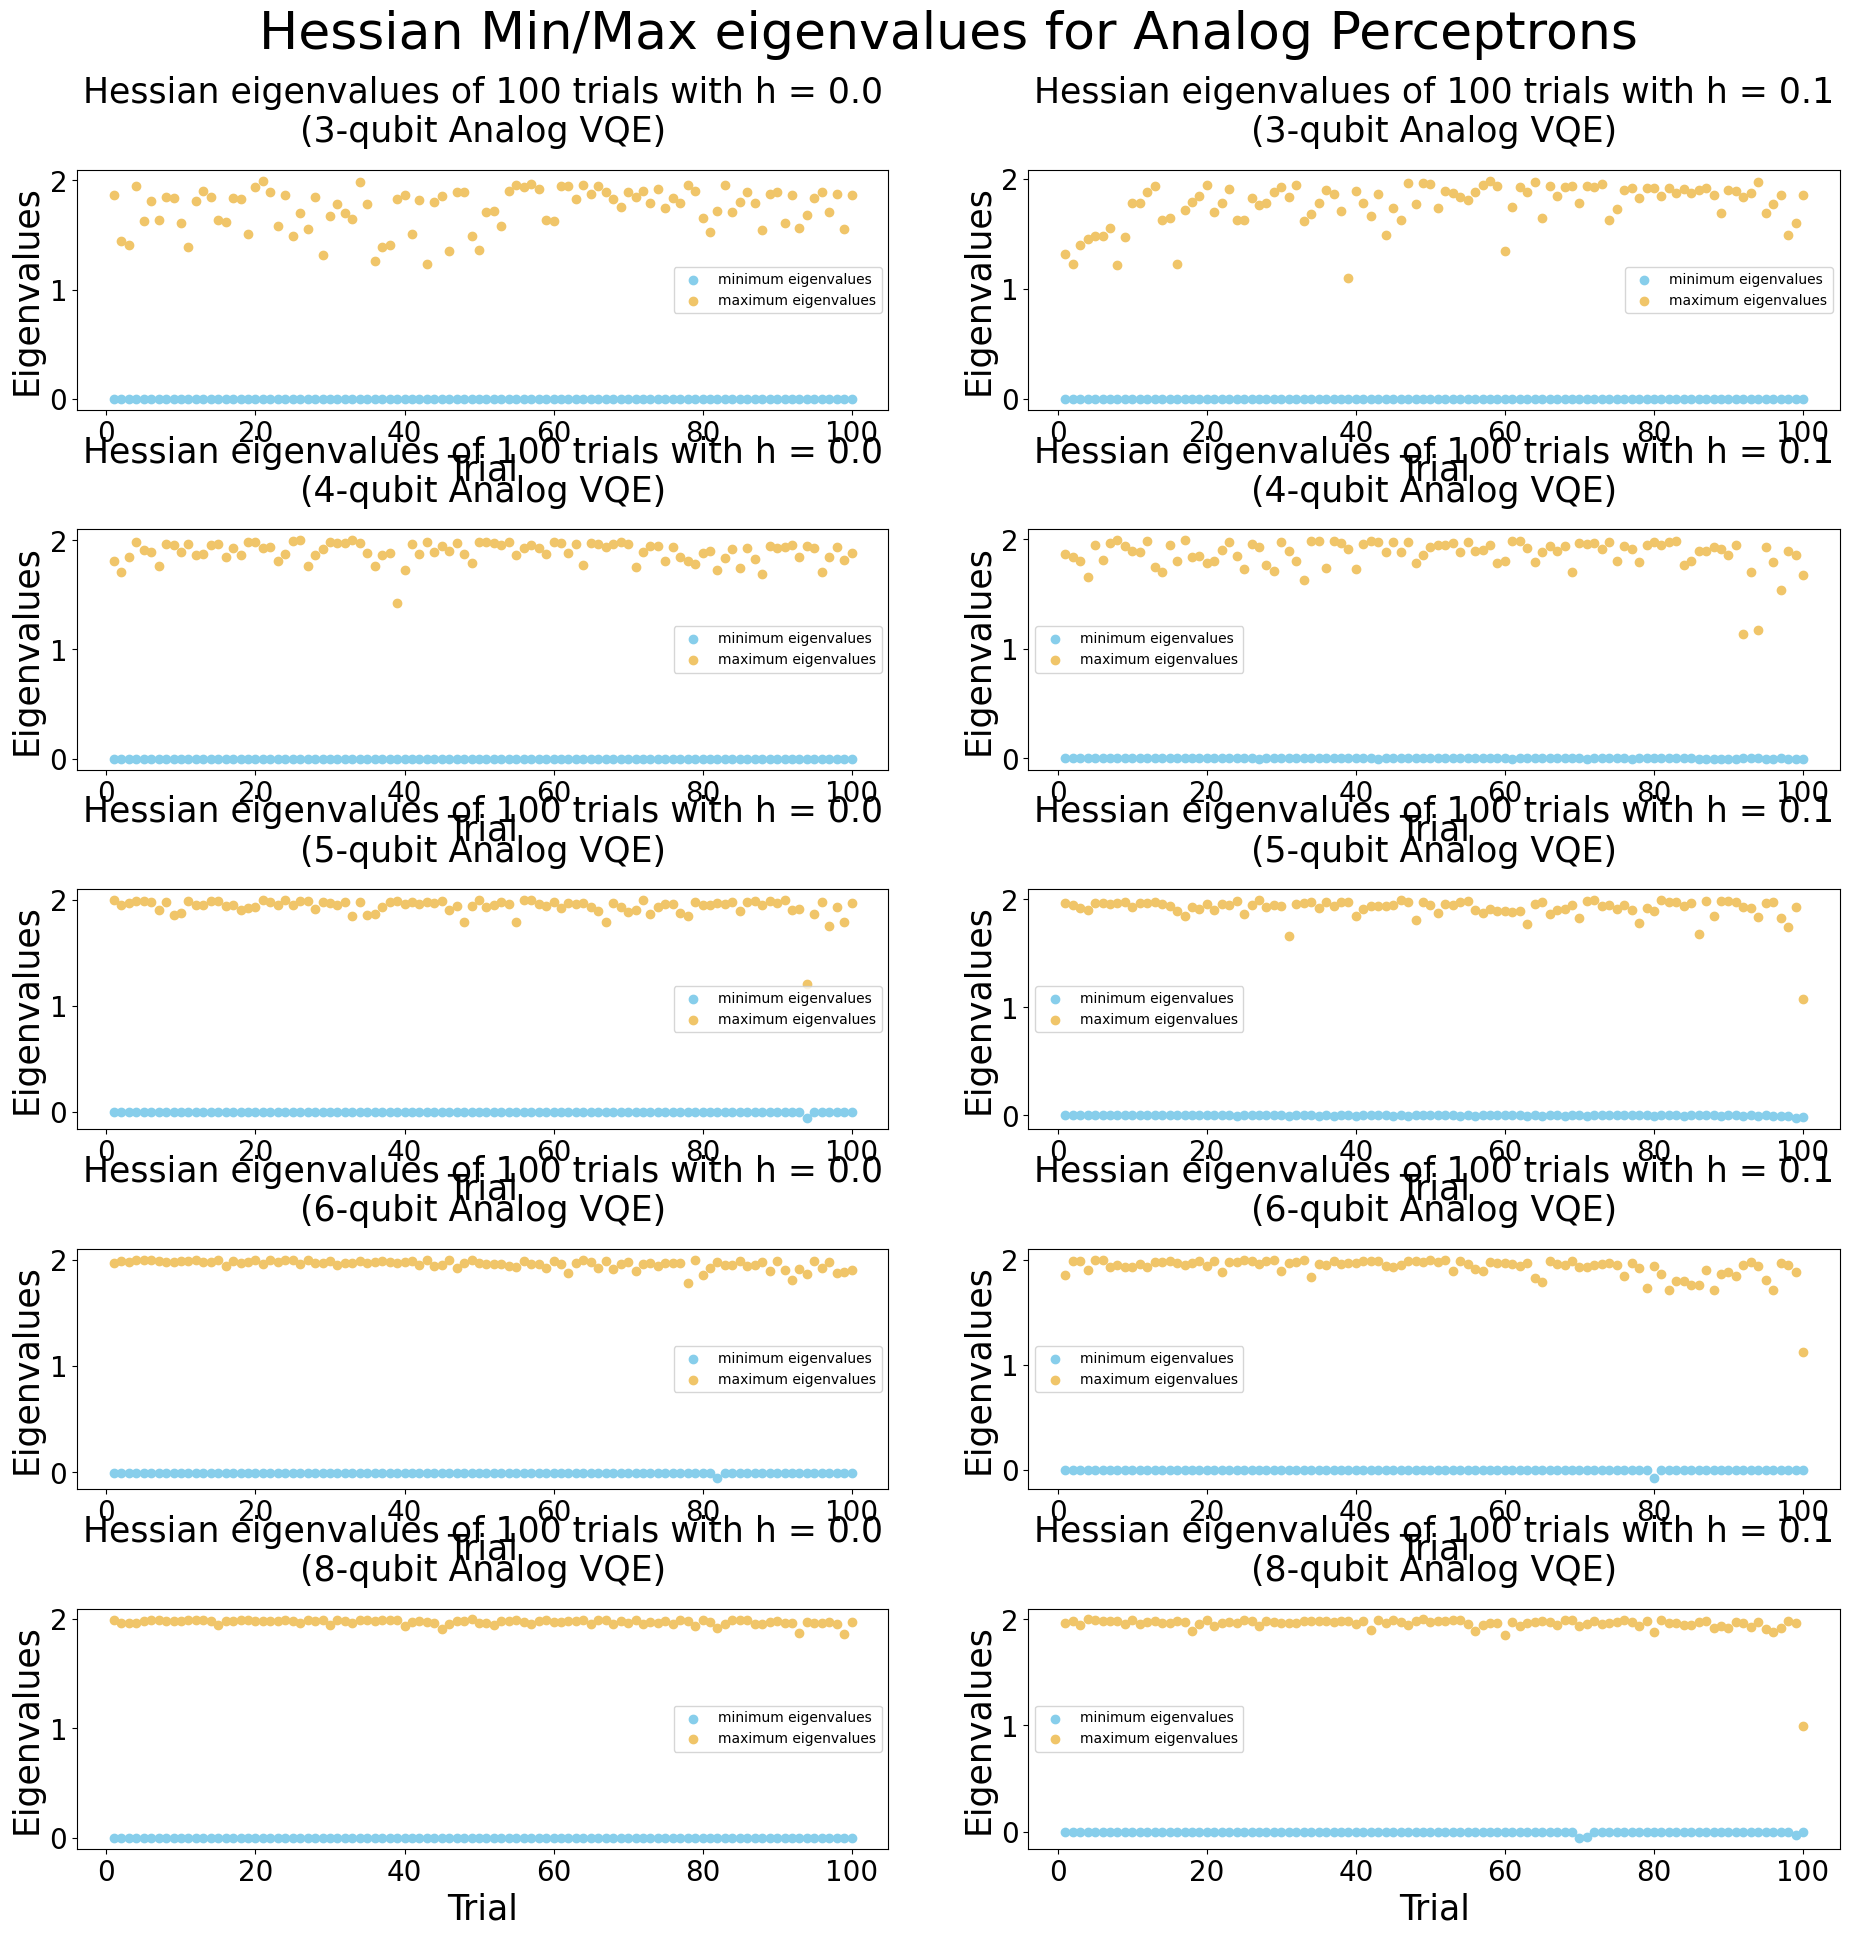

In [83]:
# Same plot but as a Mosaic

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '8_0.0': 'I',
    '8_0.1': 'J',
    '10_0.0': 'K',
    '10_0.1': 'L',
}


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    key = f'{n_qubits}_{transverse_field_coefficient}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]
    
    ax.set_title(f"{n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize*1, pad=20)

    make_minmax_eigval_plot(problem, ax)



fig.suptitle(f"Hessian Min/Max eigenvalues for Analog Perceptrons", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)


filename = results_path + '/' +  f'minmax_hessian_eigenvalues_{n_qubits}qubits_{transverse_field_coefficient}transverse_field_MOSAIC.pdf'


# plt.tight_layout()

plt.savefig(filename, bbox_inches="tight")
# plt.show()

## Distance Analysis

3 Qubits with h = 0.0:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -2.0 | frequency: 100
Real spectrum:
    [-2. -2.  0.  0.  0.  0.  2.  2.]
[-2.0000014305114746]
[100]
3 Qubits with h = 0.1:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -2.013 | frequency: 100
Real spectrum:
    [-2.0134993  -2.0115194  -0.09999997 -0.09802008  0.09801986  0.10000003  2.0115194   2.0134993 ]
[-2.013376235961914]
[100]
4 Qubits with h = 0.0:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -3.0 | frequency: 100
Real spectrum:
    [-3. -3. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  3.  3.]
[-3.000002384185791]
[100]
4 Qubits with h = 0.1:
Found spectrum (given a 0.001 tolerance)
    0 excited state:
        -3.015 | frequency: 100
Real spectrum:
    [-3.0151112  -3.014913   -1.1482025  -1.1480045  -1.0001978  -0.99999976 -0.8669085  -0.8667104   0.866711    0.8669085   0.99999964  1.0001979   1.148005    1.1482022   3.0149126 

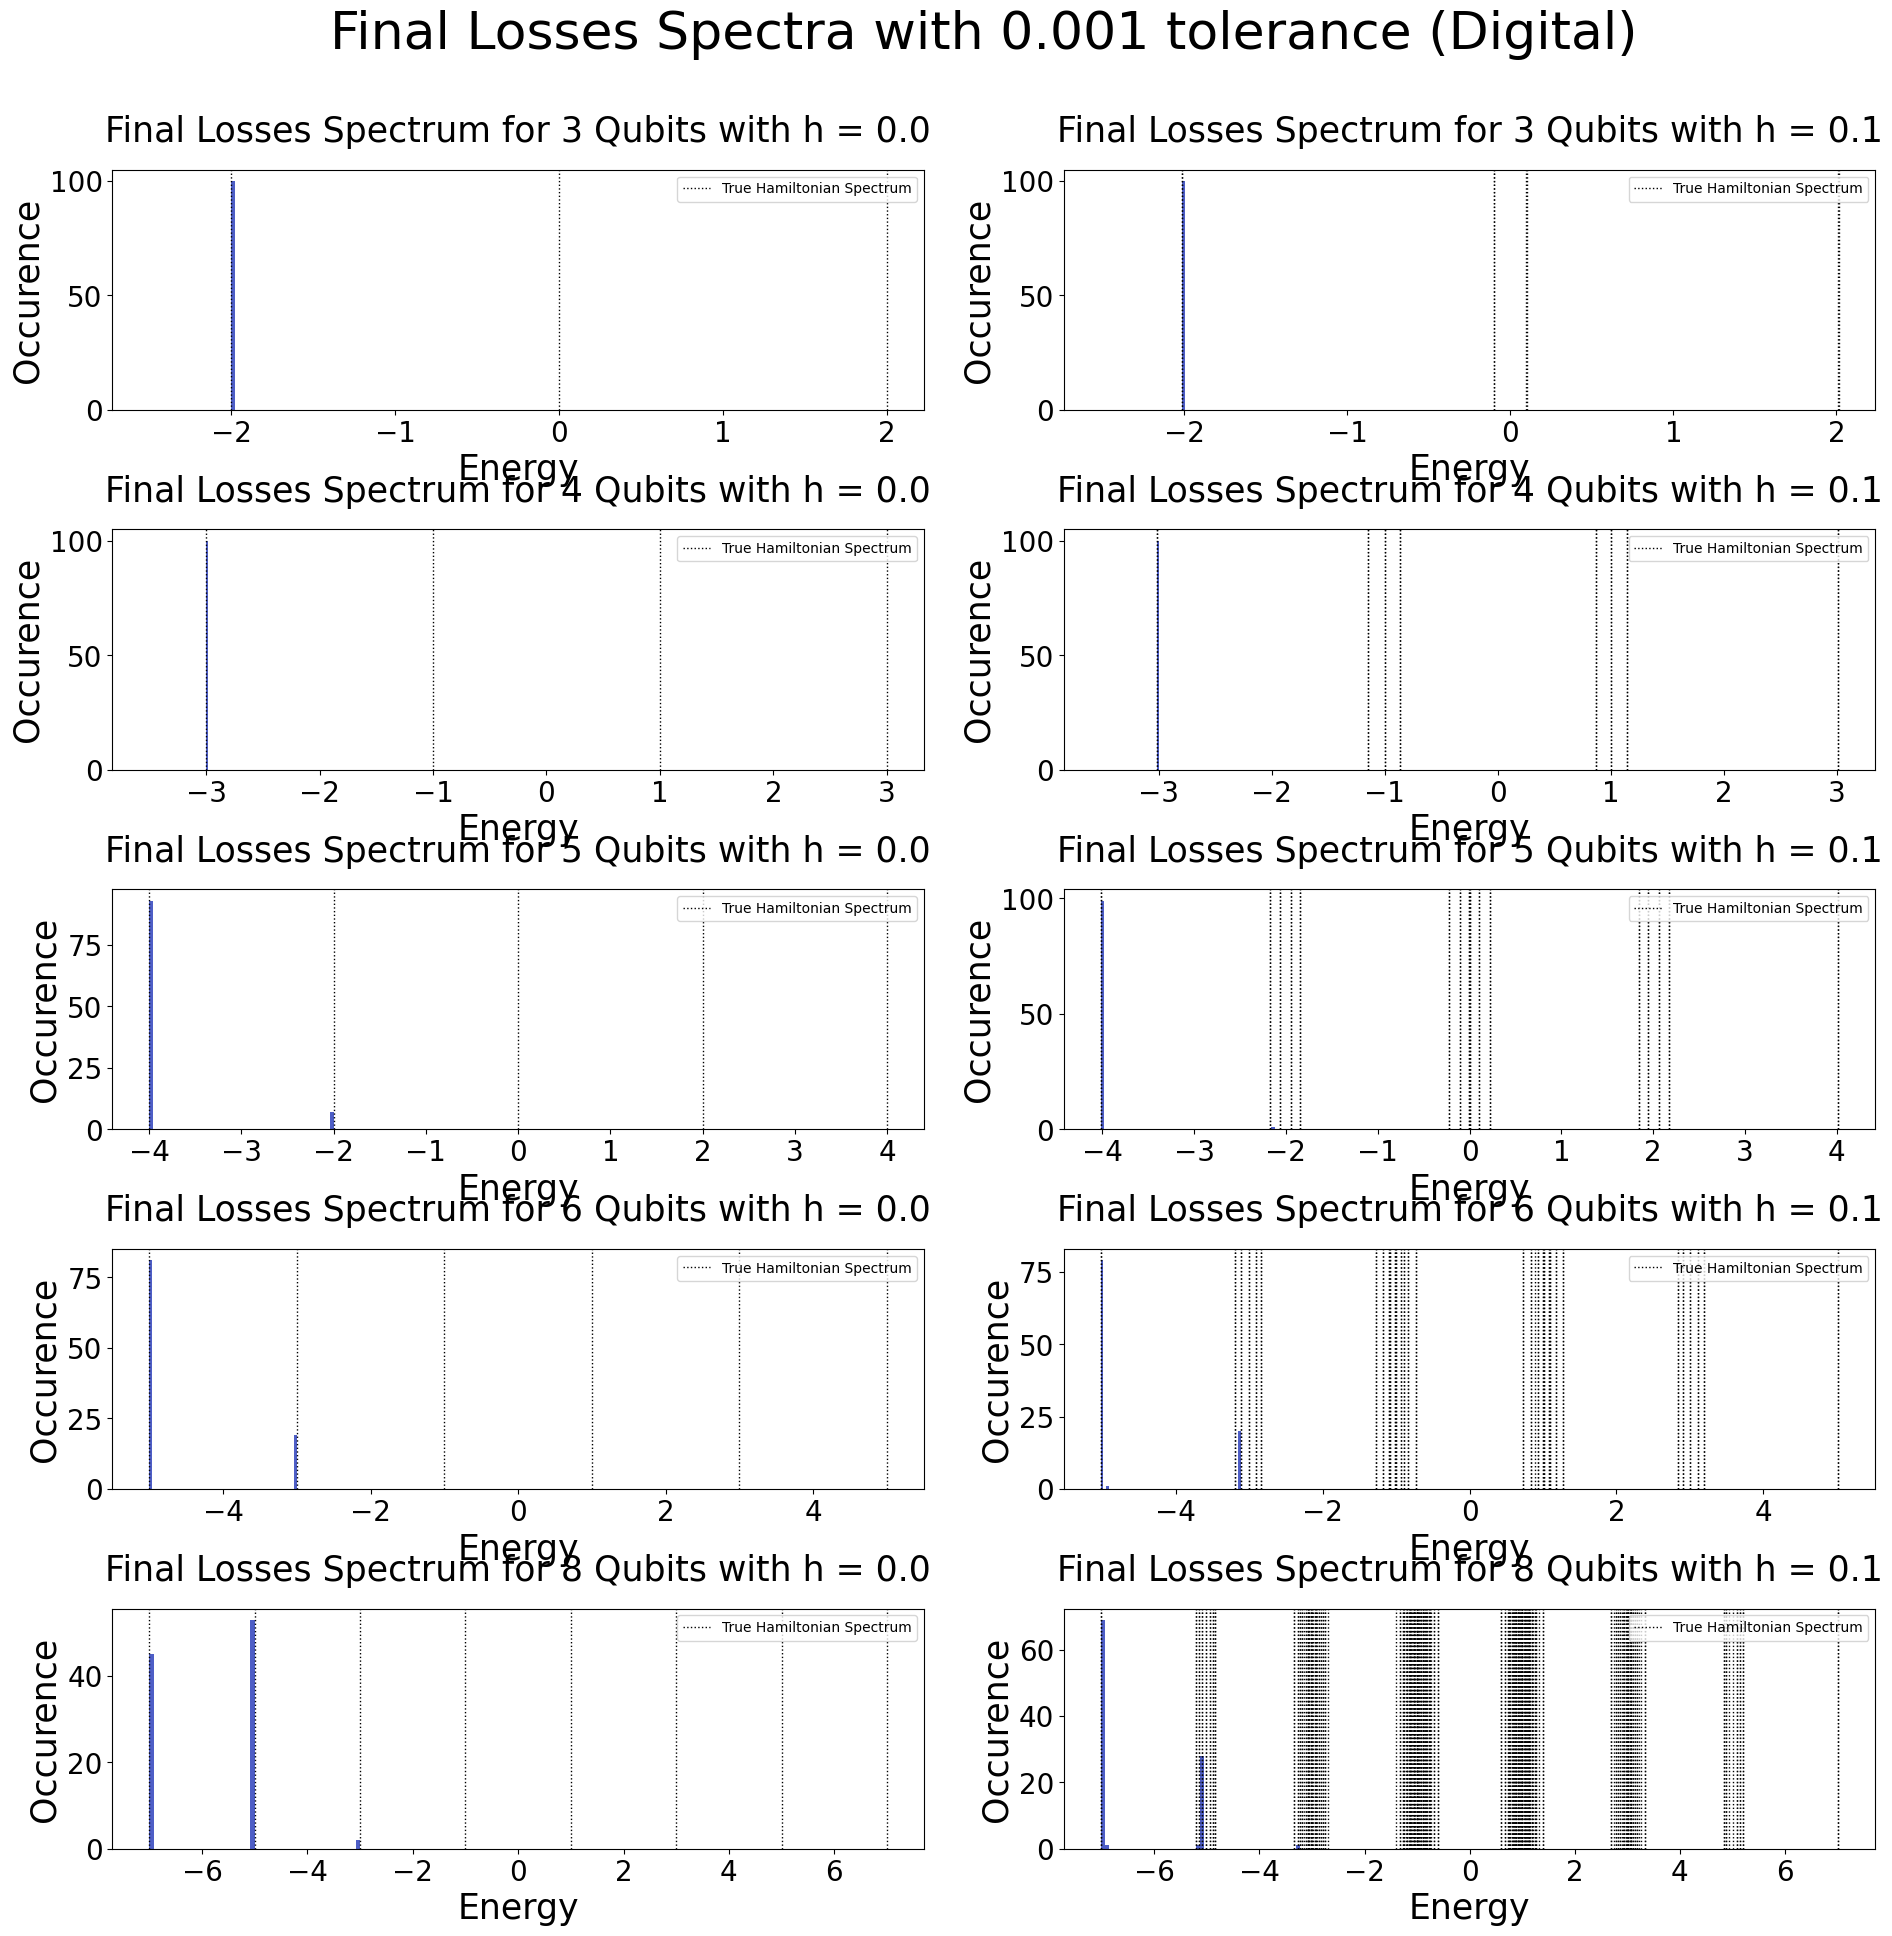

In [84]:
tolerance = 0.001

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '8_0.0': 'I',
    '8_0.1': 'J',
    '10_0.0': 'K',
    '10_0.1': 'L',
}



fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    # depth = problem['depth']
    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}:')

    simulation_results = problem['simulation_results']

    all_final_parameters = simulation_results['all_final_parameters']
    all_final_costs = simulation_results['all_costs_trajectories'][:,-1]
    all_parameters_trajectories = simulation_results['all_parameters_trajectories']

    # print(simulation_results.keys())

    parameters_dim = len(all_final_parameters[-1])
    trials = problem['trials']

    # print(parameters_dim)

    # print(all_final_costs)

    cuts = []

    for ii in range(trials-1):

        diff = all_final_costs[ii]-all_final_costs[ii+1]
        # print(f'{ii} vs {ii+1}:\n   {diff}')

        if np.abs(diff) > tolerance:
            cuts.append((ii, ii+1))

    # print(cuts)

    print(f'Found spectrum (given a {tolerance} tolerance)')

    split_cuts = [k[-1] for k in cuts]

    costs_split = np.split(all_final_costs, split_cuts)

    parameters_split = np.split(all_final_parameters, split_cuts)

    parameters_trajectories_split =np.split(all_parameters_trajectories, split_cuts)

    simulation_results['final_parameters_split'] = parameters_split

    spectrum_dict = {}

    energies = []
    frequencies = []

    for state in range(len(costs_split)):
        energy = np.mean(costs_split[state][0])
        frequency = len(costs_split[state])

        energies.append(energy)
        frequencies.append(frequency)

        print(f'    {state} excited state:\n        {round(energy,3)} | frequency: {frequency}')


        spectrum_dict[f'{state}_excited_state']= {
            'final_costs': costs_split[state],
            'mean_cost': energy,
            'frequency': frequency,
            'final_parameters': parameters_split[state],
            'parameter_trajectories': parameters_trajectories_split[state],
        }

    loss_hamiltonian_spectrum = problem['loss_hamiltonian_spectrum']
    print(f"Real spectrum:\n    {problem['loss_hamiltonian_spectrum']}")

    print(energies)
    print(frequencies)

    simulation_results['spectrum_dictionary'] = spectrum_dict

    # fig, ax = plt.subplots()


    key = f'{n_qubits}_{transverse_field_coefficient}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]

    # Plot the histogram
    ax.hist(energies, bins=50, weights=frequencies, align="mid", color=plt.get_cmap("coolwarm", 7)(0), alpha=0.9)

    ax.set_title(f"Final Losses Spectrum for {n_qubits} Qubits with h = {transverse_field_coefficient}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Energy", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)


    qubits_folder = results_path + f'{n_qubits} qubits/'

    # create_folder(qubits_folder)
    
    # filename = qubits_folder + f'final_spectrum_{n_qubits}qubits_{transverse_field_coefficient}transverse_field.pdf'

    spectrum_lines = np.unique(loss_hamiltonian_spectrum)
    for state in range(len(spectrum_lines)):

        line = spectrum_lines[state]

        if state == 0:
            # label = 'Ground State'
            label = 'True Hamiltonian Spectrum'
        else:
            # label = f"{state} Excited State"
            label = ''

        ax.axvline(x = line, color = 'black', label = label, linestyle = ':', linewidth=1)

    # ax.set_xlim(loss_limits)

    ax.legend(loc='upper right')




fig.suptitle(f"Final Losses Spectra with {tolerance} tolerance (Digital)", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)

# plt.tight_layout()

# plt.tight_layout()


filename = results_path + '/' + 'final_losses_spectrum_with_tolerance.pdf'


plt.savefig(filename, bbox_inches="tight")


### Statistics

In [85]:
from scipy.spatial.distance import pdist

def distance_statistics(parameter_trajectories, hilbert_dimension):
    training_distances = []
    for trajectory in parameter_trajectories:
        training_distance = np.linalg.norm(trajectory[0] - trajectory[-1])
        training_distance = training_distance
        training_distances.append(training_distance)

    training_distances = np.asarray(training_distances)

    # final_parameters = parameter_trajectories[:,-1]
    # statistics:

    training_mean = np.mean(training_distances)
    training_median = np.median(training_distances)
    training_std = np.std(training_distances)

    print('\n     Training Distance Statistics:\n')
    print(f'        Mean training distance: {training_mean}')
    print(f'        Median training distance: {training_median}')
    print(f'        Standard deviation of the training distance: {training_std}')

    final_parameters = parameter_trajectories[:,-1]

    inner_distances = pdist(final_parameters)

    inner_mean = np.mean(inner_distances)
    inner_median = np.median(inner_distances)
    inner_std = np.std(inner_distances)

    print('\n     Distances Between Minima Statistics:\n')
    print(f'        Mean distance between minima: {inner_mean}')
    print(f'        Median distance between minima: {inner_median}')
    print(f'        Standard deviation of the distance between minima: {inner_std}')


    return training_distances, training_mean, training_median, training_std, inner_distances, inner_mean, inner_median, inner_std

In [86]:
for problem in vqe_problems:

        
    n_qubits = problem['qubits']

    transverse_field_coefficient = problem['transverse_field_coefficient']

    print(f'{n_qubits} Qubits with h = {transverse_field_coefficient}:')

    simulation_results = problem['simulation_results']
    all_parameters_trajectories = simulation_results['all_parameters_trajectories']

    # Average training distance


    spectrum_dict = simulation_results['spectrum_dictionary']

    for state in spectrum_dict.keys():
        print(f'\n    {state}')
        parameter_trajectories = spectrum_dict[state]['parameter_trajectories']
        training_distances, training_mean, training_median, training_std, inner_distances, inner_mean, inner_median, inner_std = distance_statistics(parameter_trajectories, 1)
        spectrum_dict[state]['training_distance_statistics'] = {
            'distances': training_distances,
            'mean': training_mean,
            'median': training_median,
            'std': training_std
        }
        spectrum_dict[state]['distance_between_minima_statistics'] = {
            'distances': inner_distances,
            'mean': inner_mean,
            'median': inner_median,
            'std': inner_std
        }




3 Qubits with h = 0.0:

    0_excited_state

     Training Distance Statistics:

        Mean training distance: 8.394119262695312
        Median training distance: 8.396739959716797
        Standard deviation of the training distance: 1.2827917337417603

     Distances Between Minima Statistics:

        Mean distance between minima: 9.70638547154725
        Median distance between minima: 10.014689384155076
        Standard deviation of the distance between minima: 2.161592163501464
3 Qubits with h = 0.1:

    0_excited_state

     Training Distance Statistics:

        Mean training distance: 8.569635391235352
        Median training distance: 8.783140182495117
        Standard deviation of the training distance: 1.6277152299880981

     Distances Between Minima Statistics:

        Mean distance between minima: 10.805259096640762
        Median distance between minima: 10.851048550385268
        Standard deviation of the distance between minima: 2.3170610136743996
4 Qubits with h =

/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/perceptron_venv/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jorgegarciaponce/Resea

### Success Rate Plot

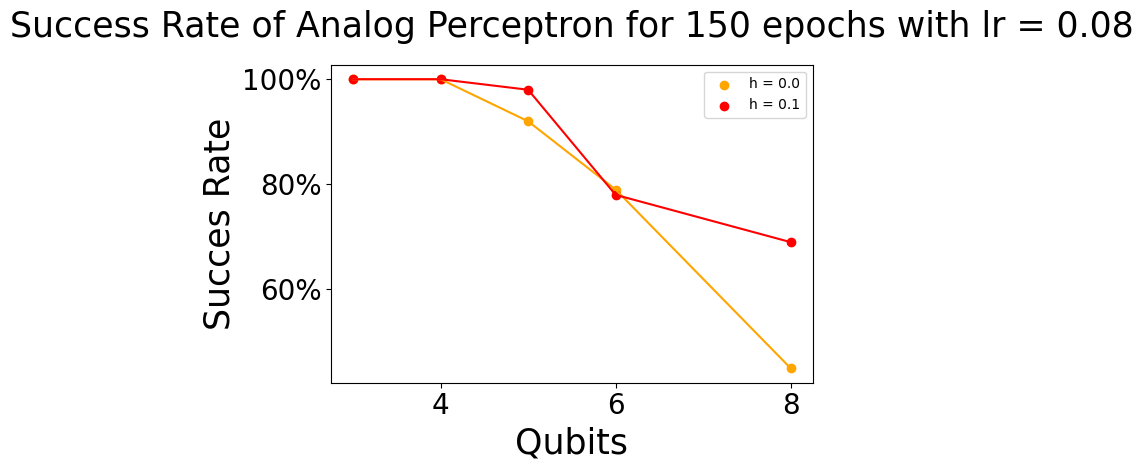

In [87]:
# Ground State Convergence statistics:
from matplotlib.ticker import PercentFormatter


lowest_energies = []
mean_energies = []
frequencies = []
qubit_number = []
transverse_fields = []

for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    # Ground State Data

    ground_state_data = spectrum_dict['0_excited_state']
    # training_distance_statistics = ground_state_data['training_distance_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    lowest_energies.append(ground_state_energy)
    mean_energies.append(mean_ground_state_energy)
    frequencies.append(frequency)
    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)


fig, ax = plt.subplots()


frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field
ax.scatter(qubit_number[field_filter], frequencies[field_filter], c='orange', label = 'h = 0.0')
ax.plot(qubit_number[field_filter], frequencies[field_filter], c='orange')

# 0.1 Field

ax.scatter(qubit_number[~field_filter], frequencies[~field_filter], c='red', label = 'h = 0.1')
ax.plot(qubit_number[~field_filter], frequencies[~field_filter], c='red')

ax.set_ylabel('Succes Rate', fontsize=label_fontsize)
ax.set_xlabel('Qubits', fontsize=label_fontsize)
ax.set_title(f'Success Rate of Analog Perceptron for 150 epochs with lr = 0.08', fontsize=label_fontsize, pad=20)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.tick_params(labelsize=tick_fontsize)


ax.legend(loc='upper right')

plt.tight_layout()

filename = results_path + 'success_rate_plot.pdf'


plt.savefig(filename, bbox_inches="tight")


# print(frequencies)

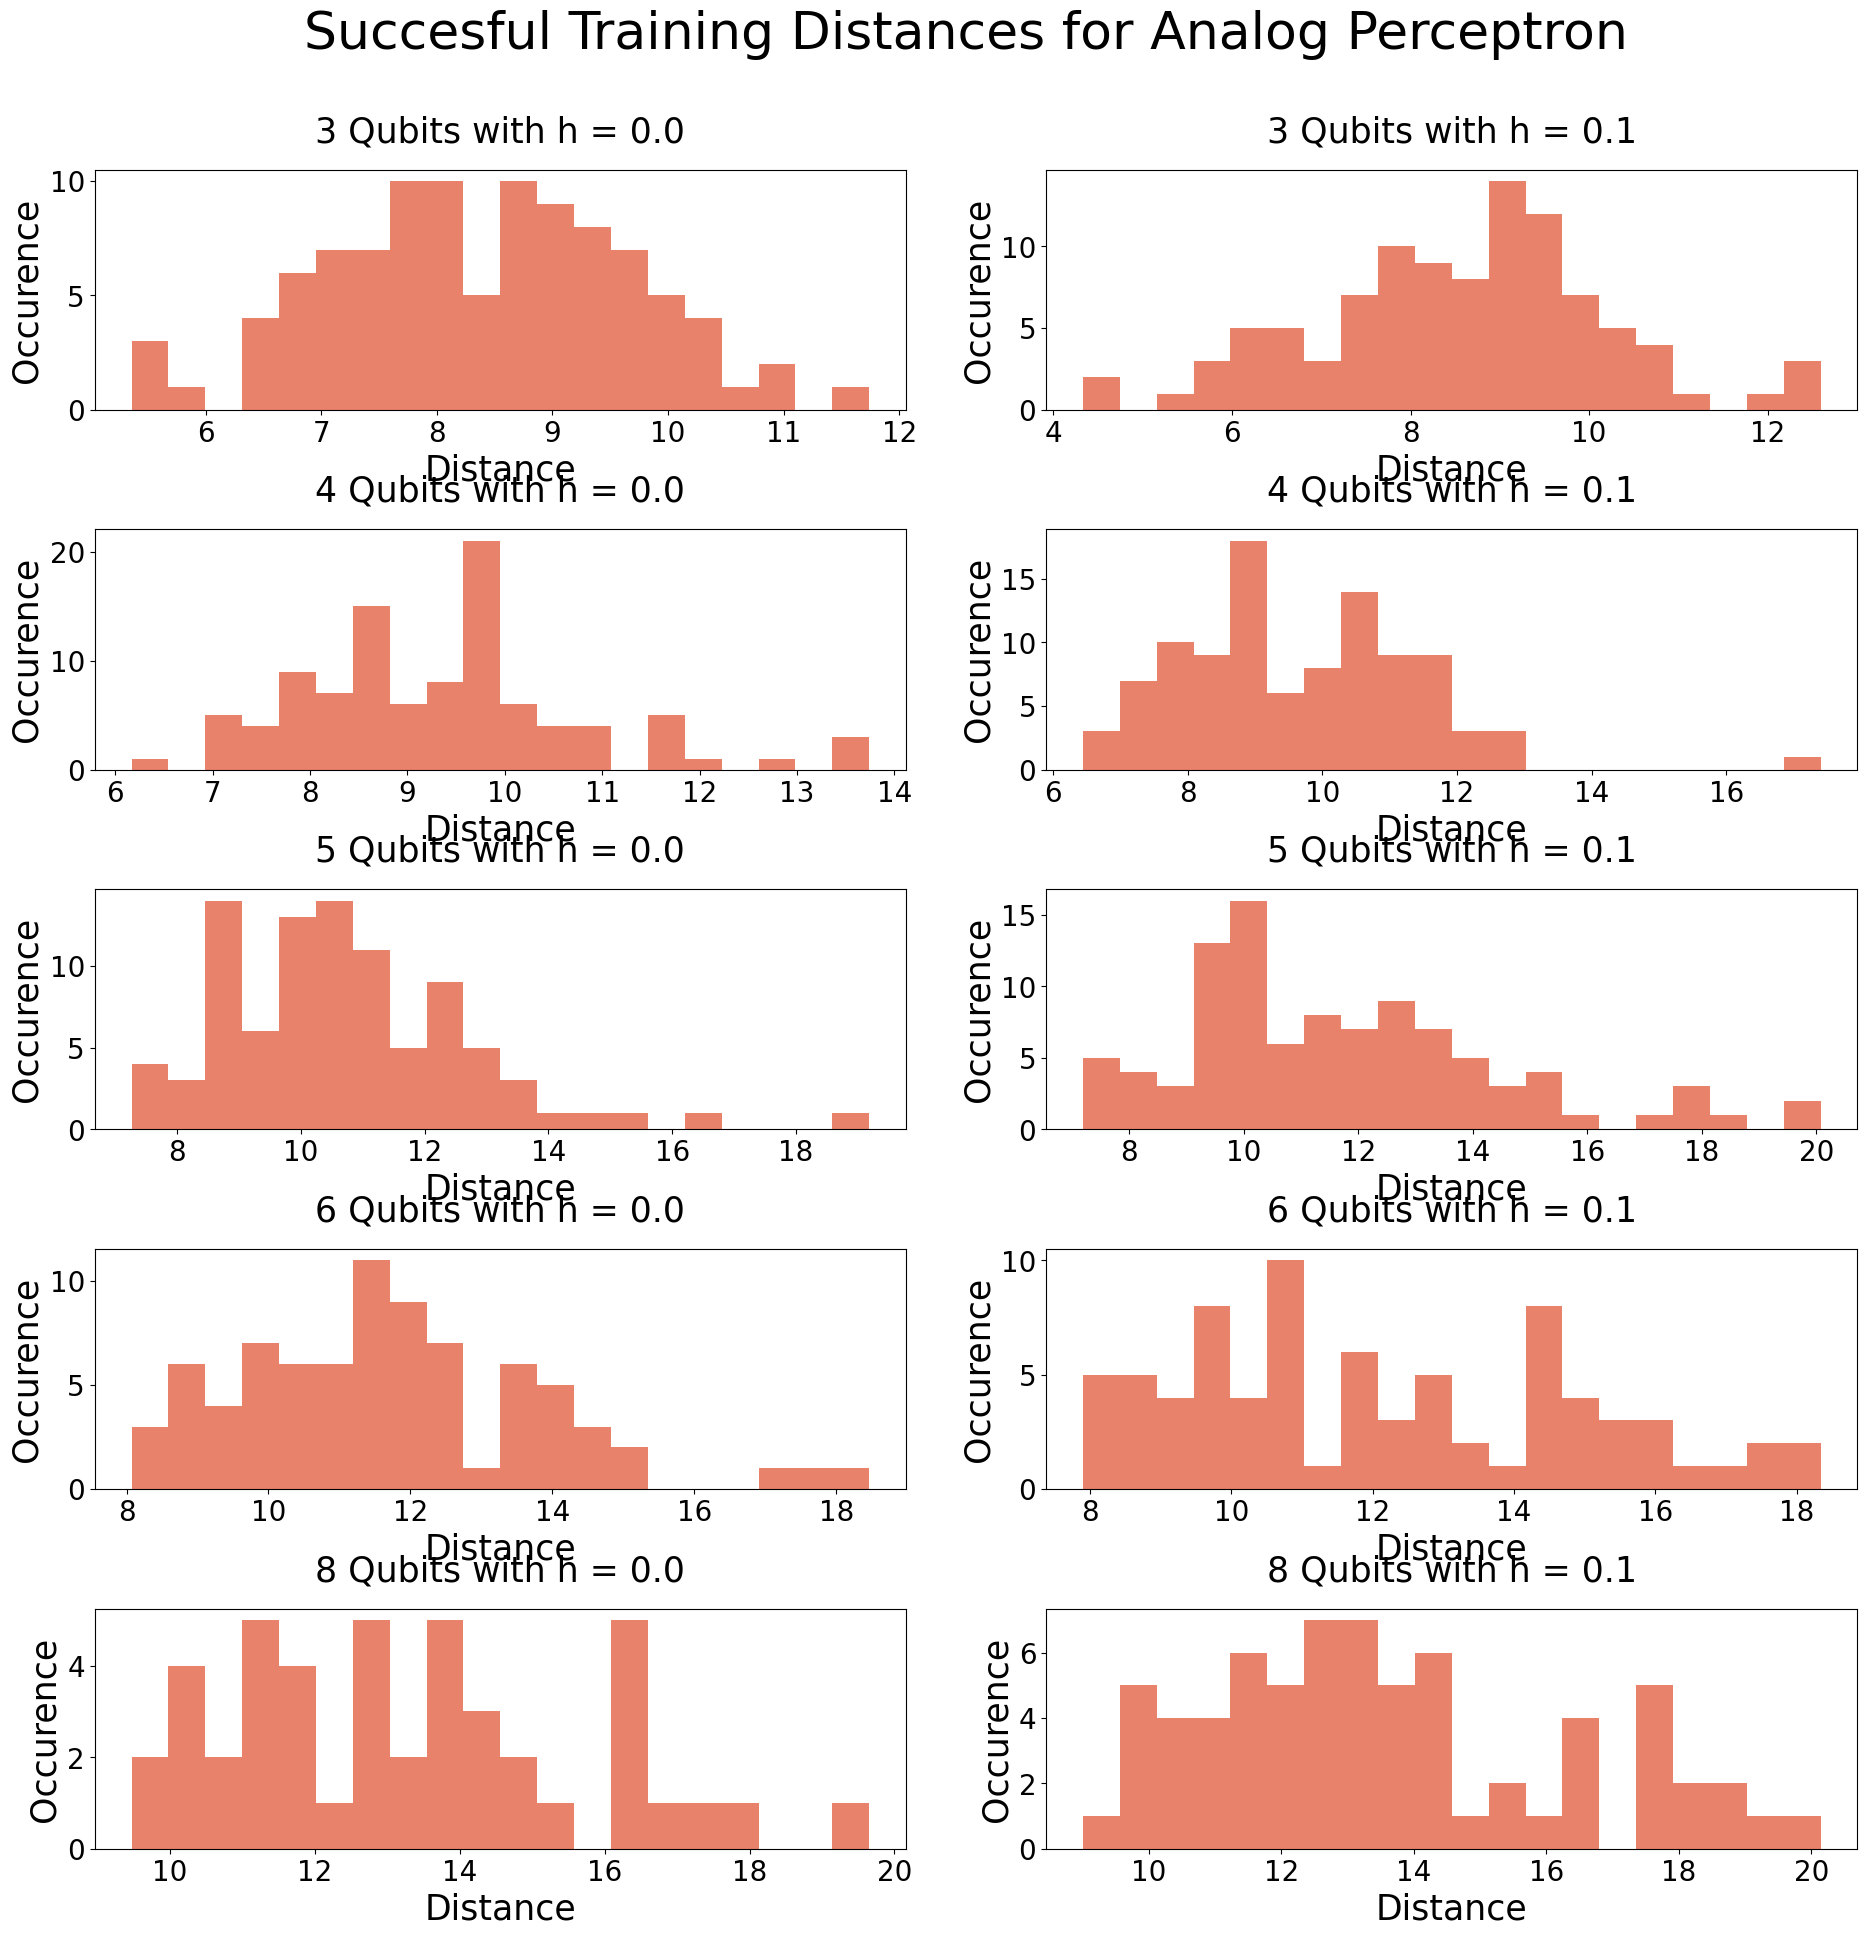

In [88]:
# Training Distance Statistics

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '8_0.0': 'I',
    '8_0.1': 'J',
    '10_0.0': 'K',
    '10_0.1': 'L',
}



std_training_distances = []
mean_training_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []



fig_training, ax_dict_training = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig_training.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    ground_state_data = spectrum_dict['0_excited_state']
    training_distance_statistics = ground_state_data['training_distance_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    training_distances = training_distance_statistics['distances']
    average_training_distance = training_distance_statistics['mean']
    median_training_distance = training_distance_statistics['median']
    std_training_distance = training_distance_statistics['std']

    mean_training_distances.append(average_training_distance)
    std_training_distances.append(std_training_distance)

    # print(training_distances)

    # fig, ax = plt.subplots()

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    ax = ax_dict_training[ax_key]

    ax.hist(training_distances, bins=20, align="mid", color=plt.get_cmap("coolwarm", 7)(5), alpha=0.9)
    # ax.set_title(f"Succesful Training Distances for {n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig_training.suptitle(f"Succesful Training Distances for Analog Perceptron", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)


# plt.tight_layout()


filename = results_path + 'training_distances_histograms.pdf'


plt.savefig(filename, bbox_inches="tight")


0.0
[3 4 5 6 8]
0.1
[3 4 5 6 8]


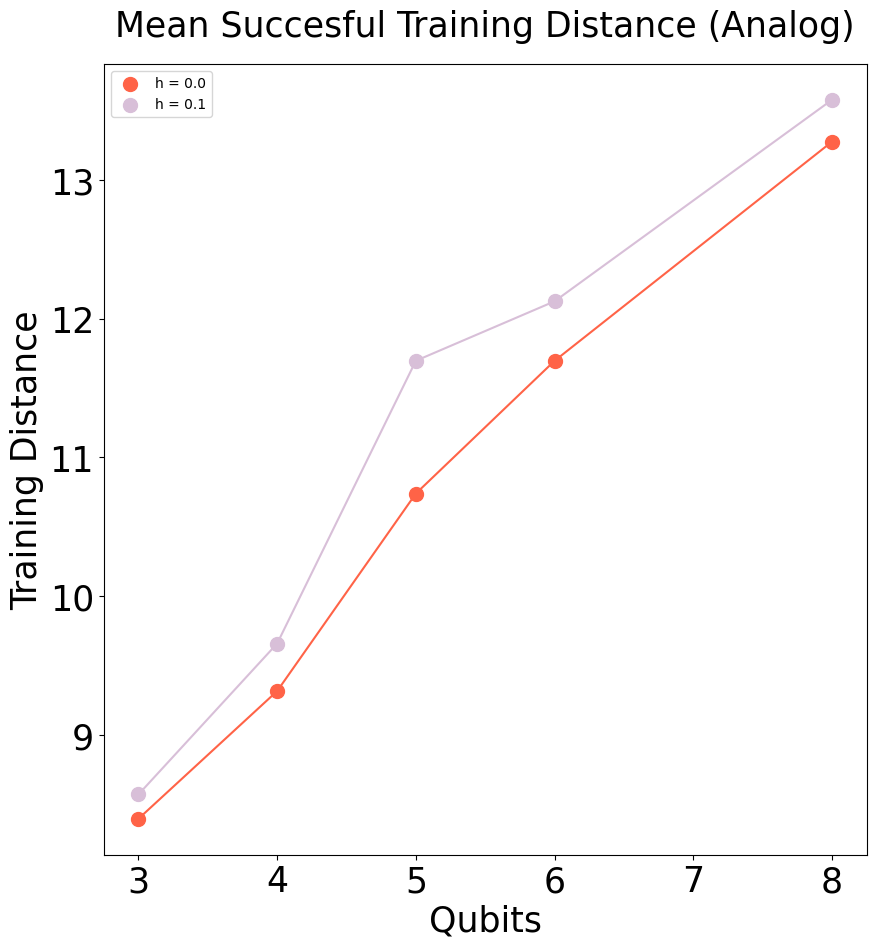

In [89]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_training_distances = np.asarray(std_training_distances)
mean_training_distances = np.asarray(mean_training_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], mean_training_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], mean_training_distances[field_filter], c='tomato')

print("0.0")
print(qubit_number[field_filter])

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], mean_training_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], mean_training_distances[~field_filter], c='thistle')

print("0.1")
print(qubit_number[~field_filter])

ax_mean.set_ylabel('Training Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Succesful Training Distance (Analog)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']

ax_mean.set_aspect('equal')

# ax_std.scatter(qubit_number[field_filter], std_training_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_training_distances[field_filter], c='orange')


# # 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_training_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_training_distances[~field_filter], c='red')

# ax_std.set_ylabel('Training Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Succesful Training Distance for 150 epochs with lr = 0.08 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
ax_mean.legend()

# plt.tight_layout()


filename = results_path + 'training_distances_statistics_plots.pdf'


plt.savefig(filename, bbox_inches="tight")


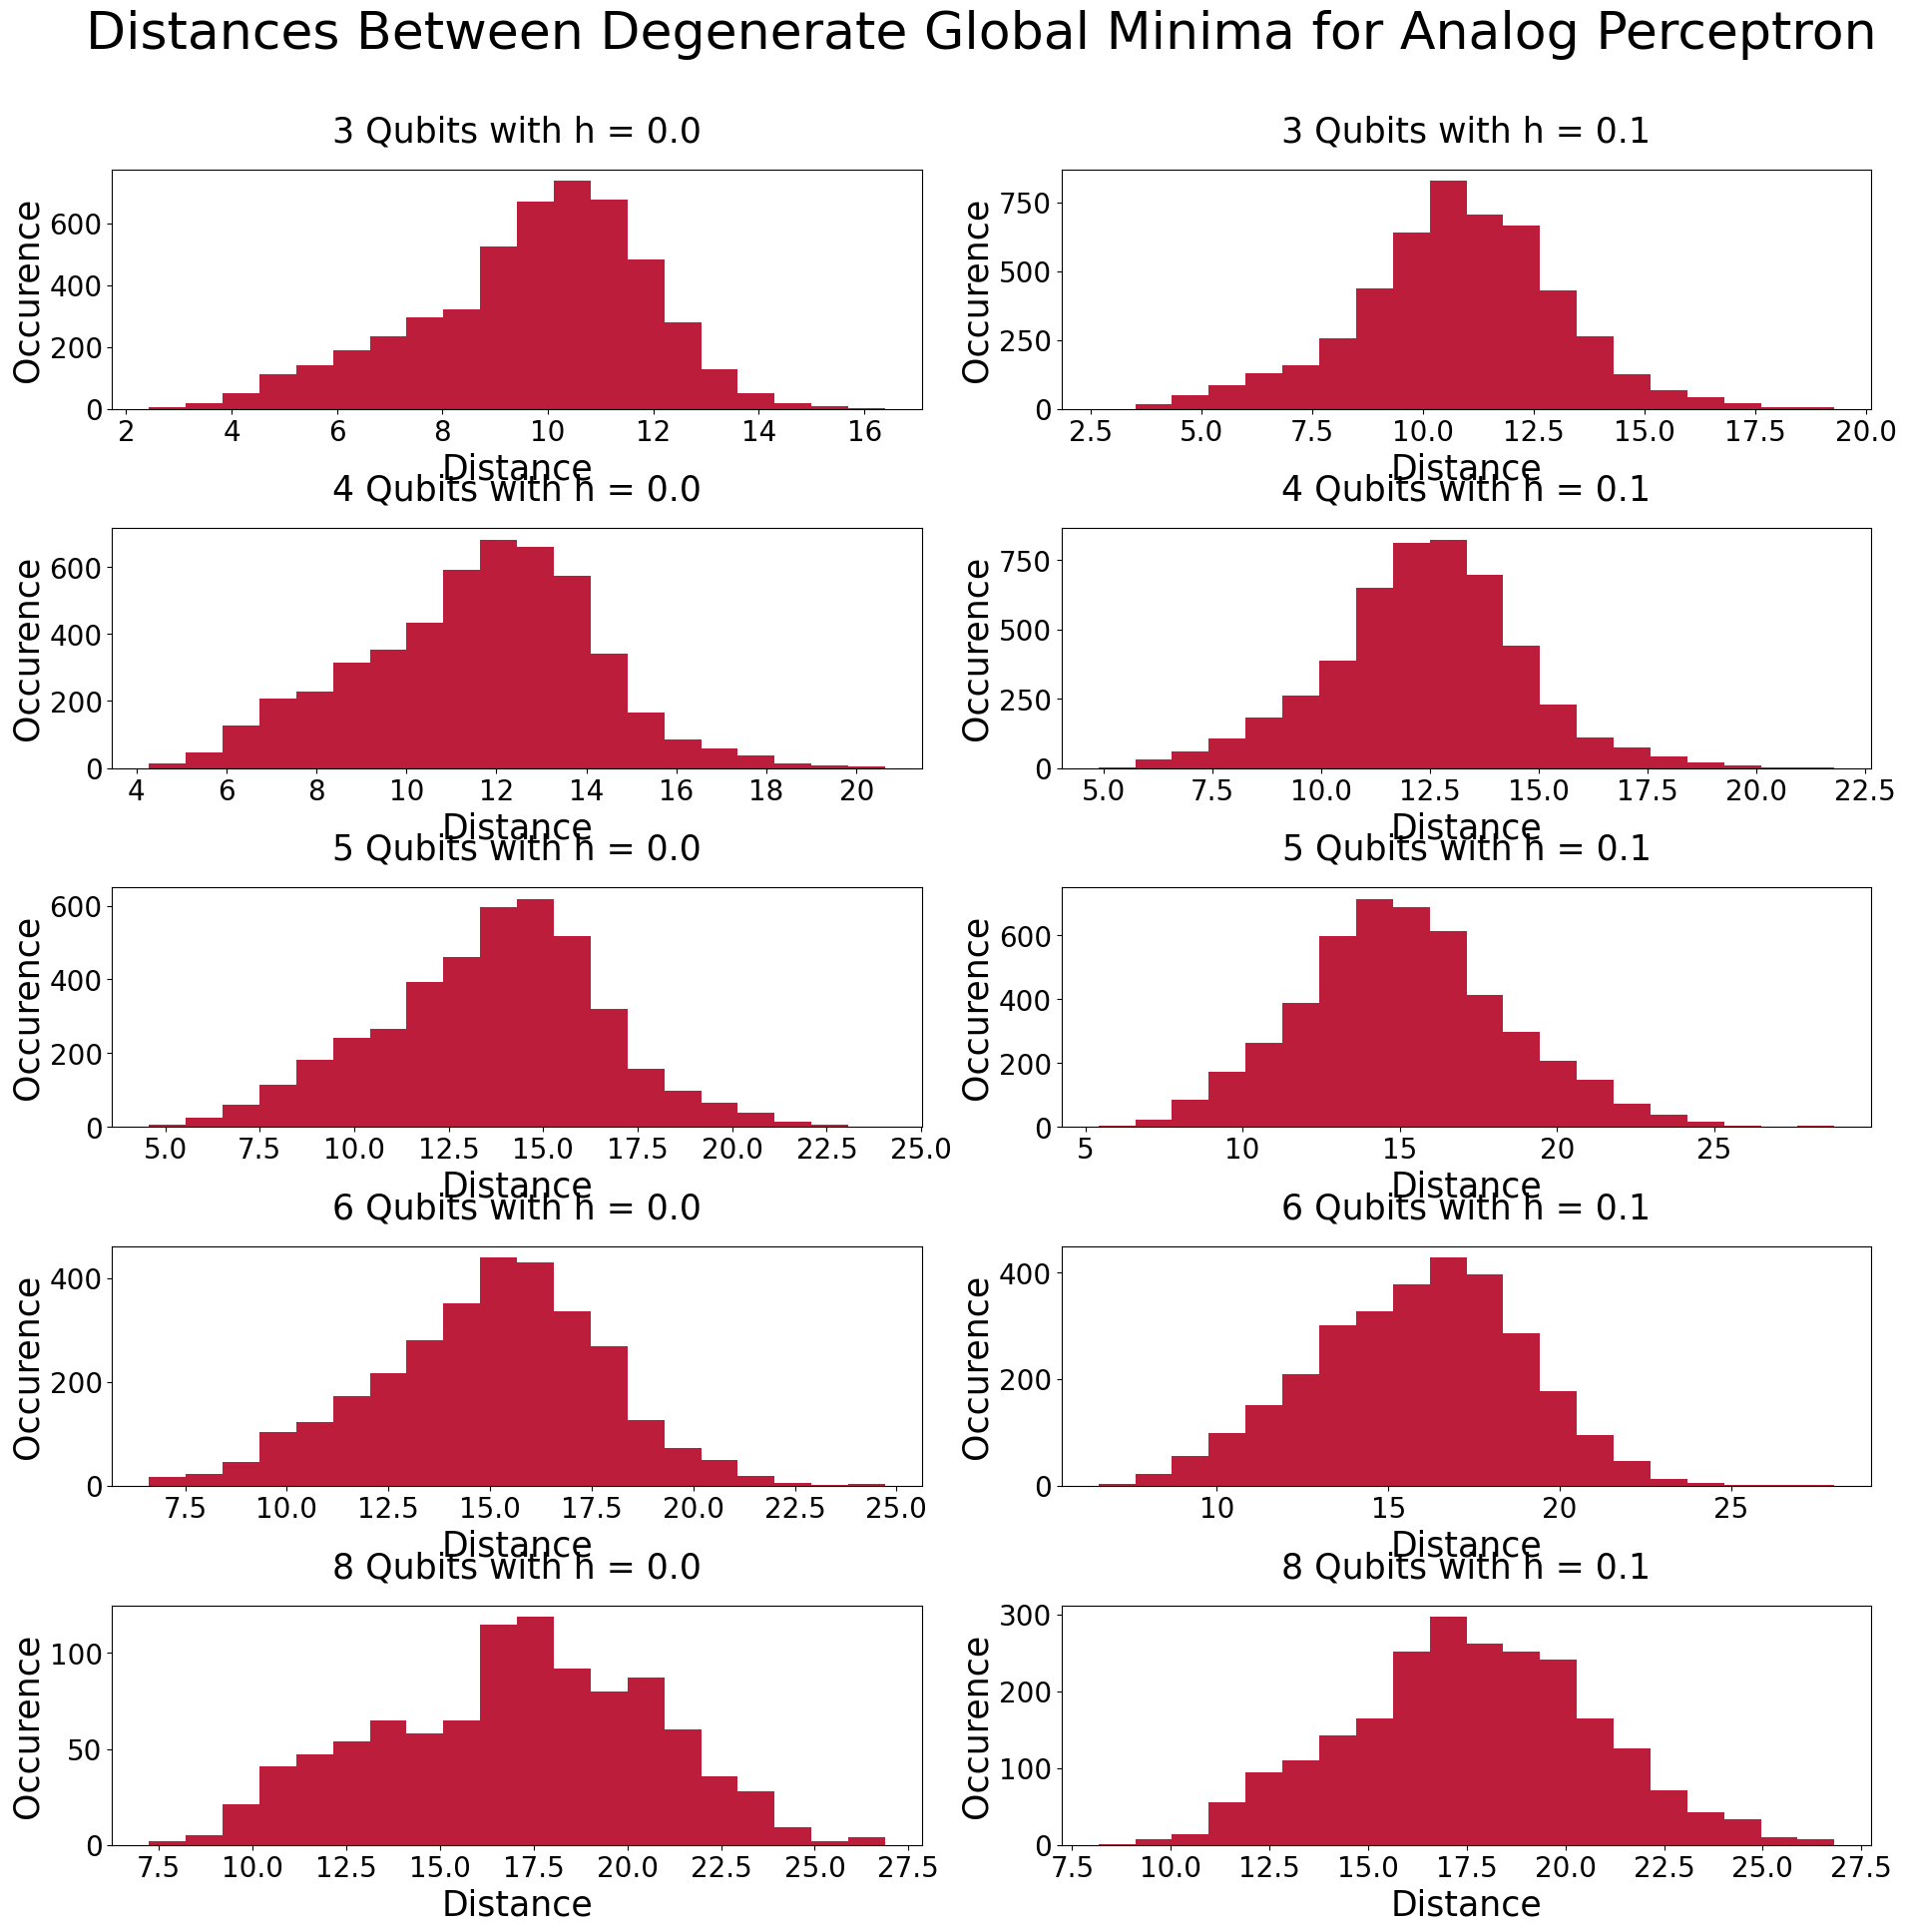

In [90]:
# Distance between minima Statistics

MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '8_0.0': 'I',
    '8_0.1': 'J',
    '10_0.0': 'K',
    '10_0.1': 'L',
}



std_inner_distances = []
mean_inner_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []



fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)


for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    spectrum_dict = simulation_results['spectrum_dictionary']

    ground_state_data = spectrum_dict['0_excited_state']
    distance_between_minima_statistics = ground_state_data['distance_between_minima_statistics']

    ground_state_energy = ground_state_data['final_costs'][0]
    mean_ground_state_energy = ground_state_data['mean_cost']
    frequency = ground_state_data['frequency']

    inner_distances = distance_between_minima_statistics['distances']
    average_distance = distance_between_minima_statistics['mean']
    median_distance = distance_between_minima_statistics['median']
    std_distance = distance_between_minima_statistics['std']

    mean_inner_distances.append(average_distance)
    std_inner_distances.append(std_distance)

    # fig, ax = plt.subplots()

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]
    # print(ax)

    # print(inner_distances)
    # print(average_distance)

    # print(inner_distances)

    ax.hist(inner_distances, bins = 20, align="mid", color=plt.get_cmap("coolwarm", 7)(9), alpha=0.9)
    # ax.set_title(f"Succesful Training Distances for {n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig.suptitle(f"Distances Between Degenerate Global Minima for Analog Perceptron", fontsize=title_fontsize*1.5)

plt.subplots_adjust(top=0.9)

# plt.show()
# # plt.tight_layout()


filename = results_path + 'distances_between_degenerate_global_minima_histograms.pdf'


plt.savefig(filename, bbox_inches="tight")




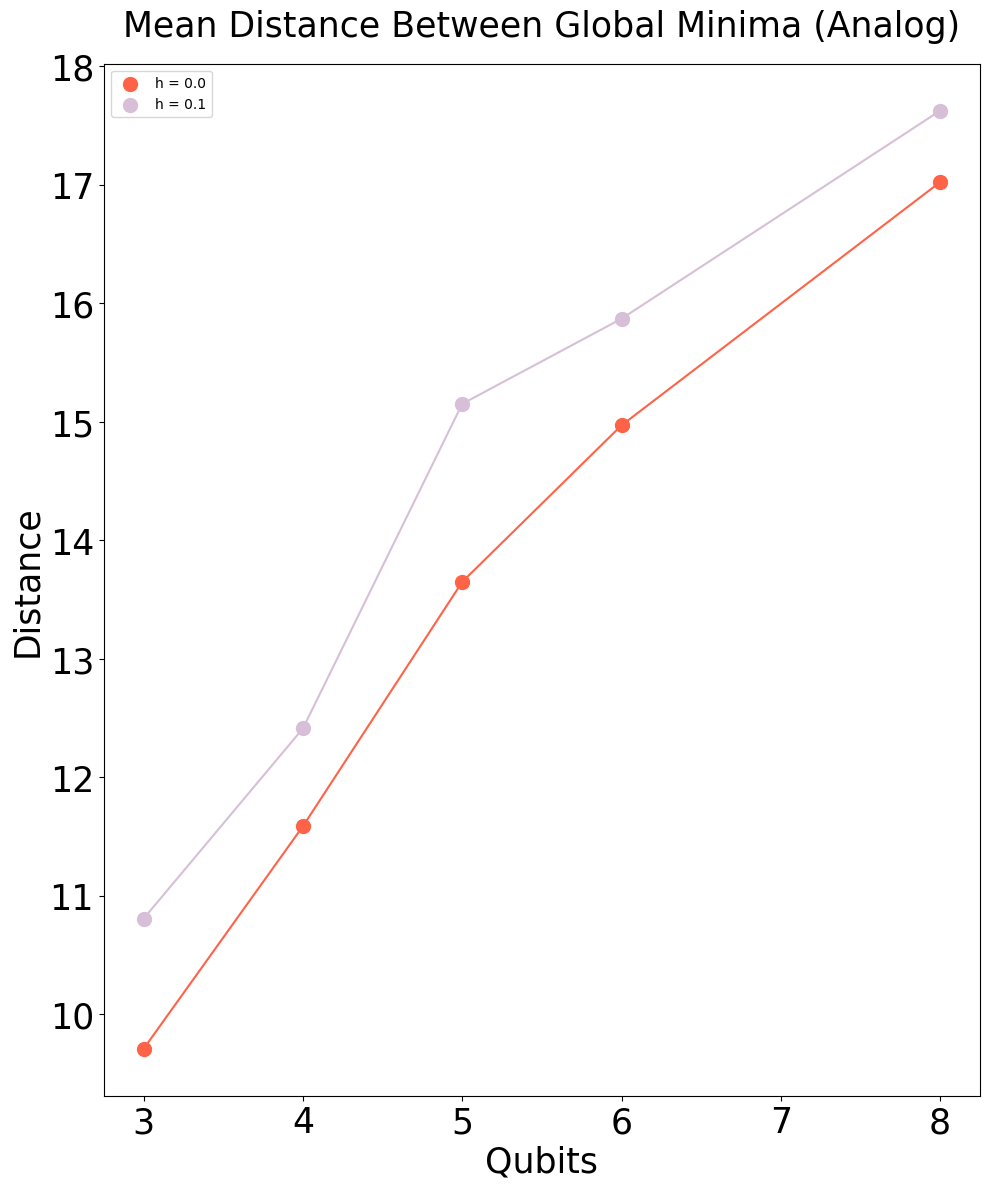

In [91]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_inner_distances = np.asarray(std_inner_distances)
mean_inner_distances = np.asarray(mean_inner_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], mean_inner_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], mean_inner_distances[field_filter], c='tomato')

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], mean_inner_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], mean_inner_distances[~field_filter], c='thistle')

ax_mean.set_ylabel('Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Distance Between Global Minima (Analog)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']


# ax_std.scatter(qubit_number[field_filter], std_inner_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_inner_distances[field_filter], c='orange')


# # 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_inner_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_inner_distances[~field_filter], c='red')

# ax_std.set_ylabel('Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Distance Between Minima for 150 epochs with lr = 0.08 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
ax_mean.legend()

plt.tight_layout()


filename = results_path + 'distances_between_degenerate_global_minima_statistics.pdf'


plt.savefig(filename, bbox_inches="tight")


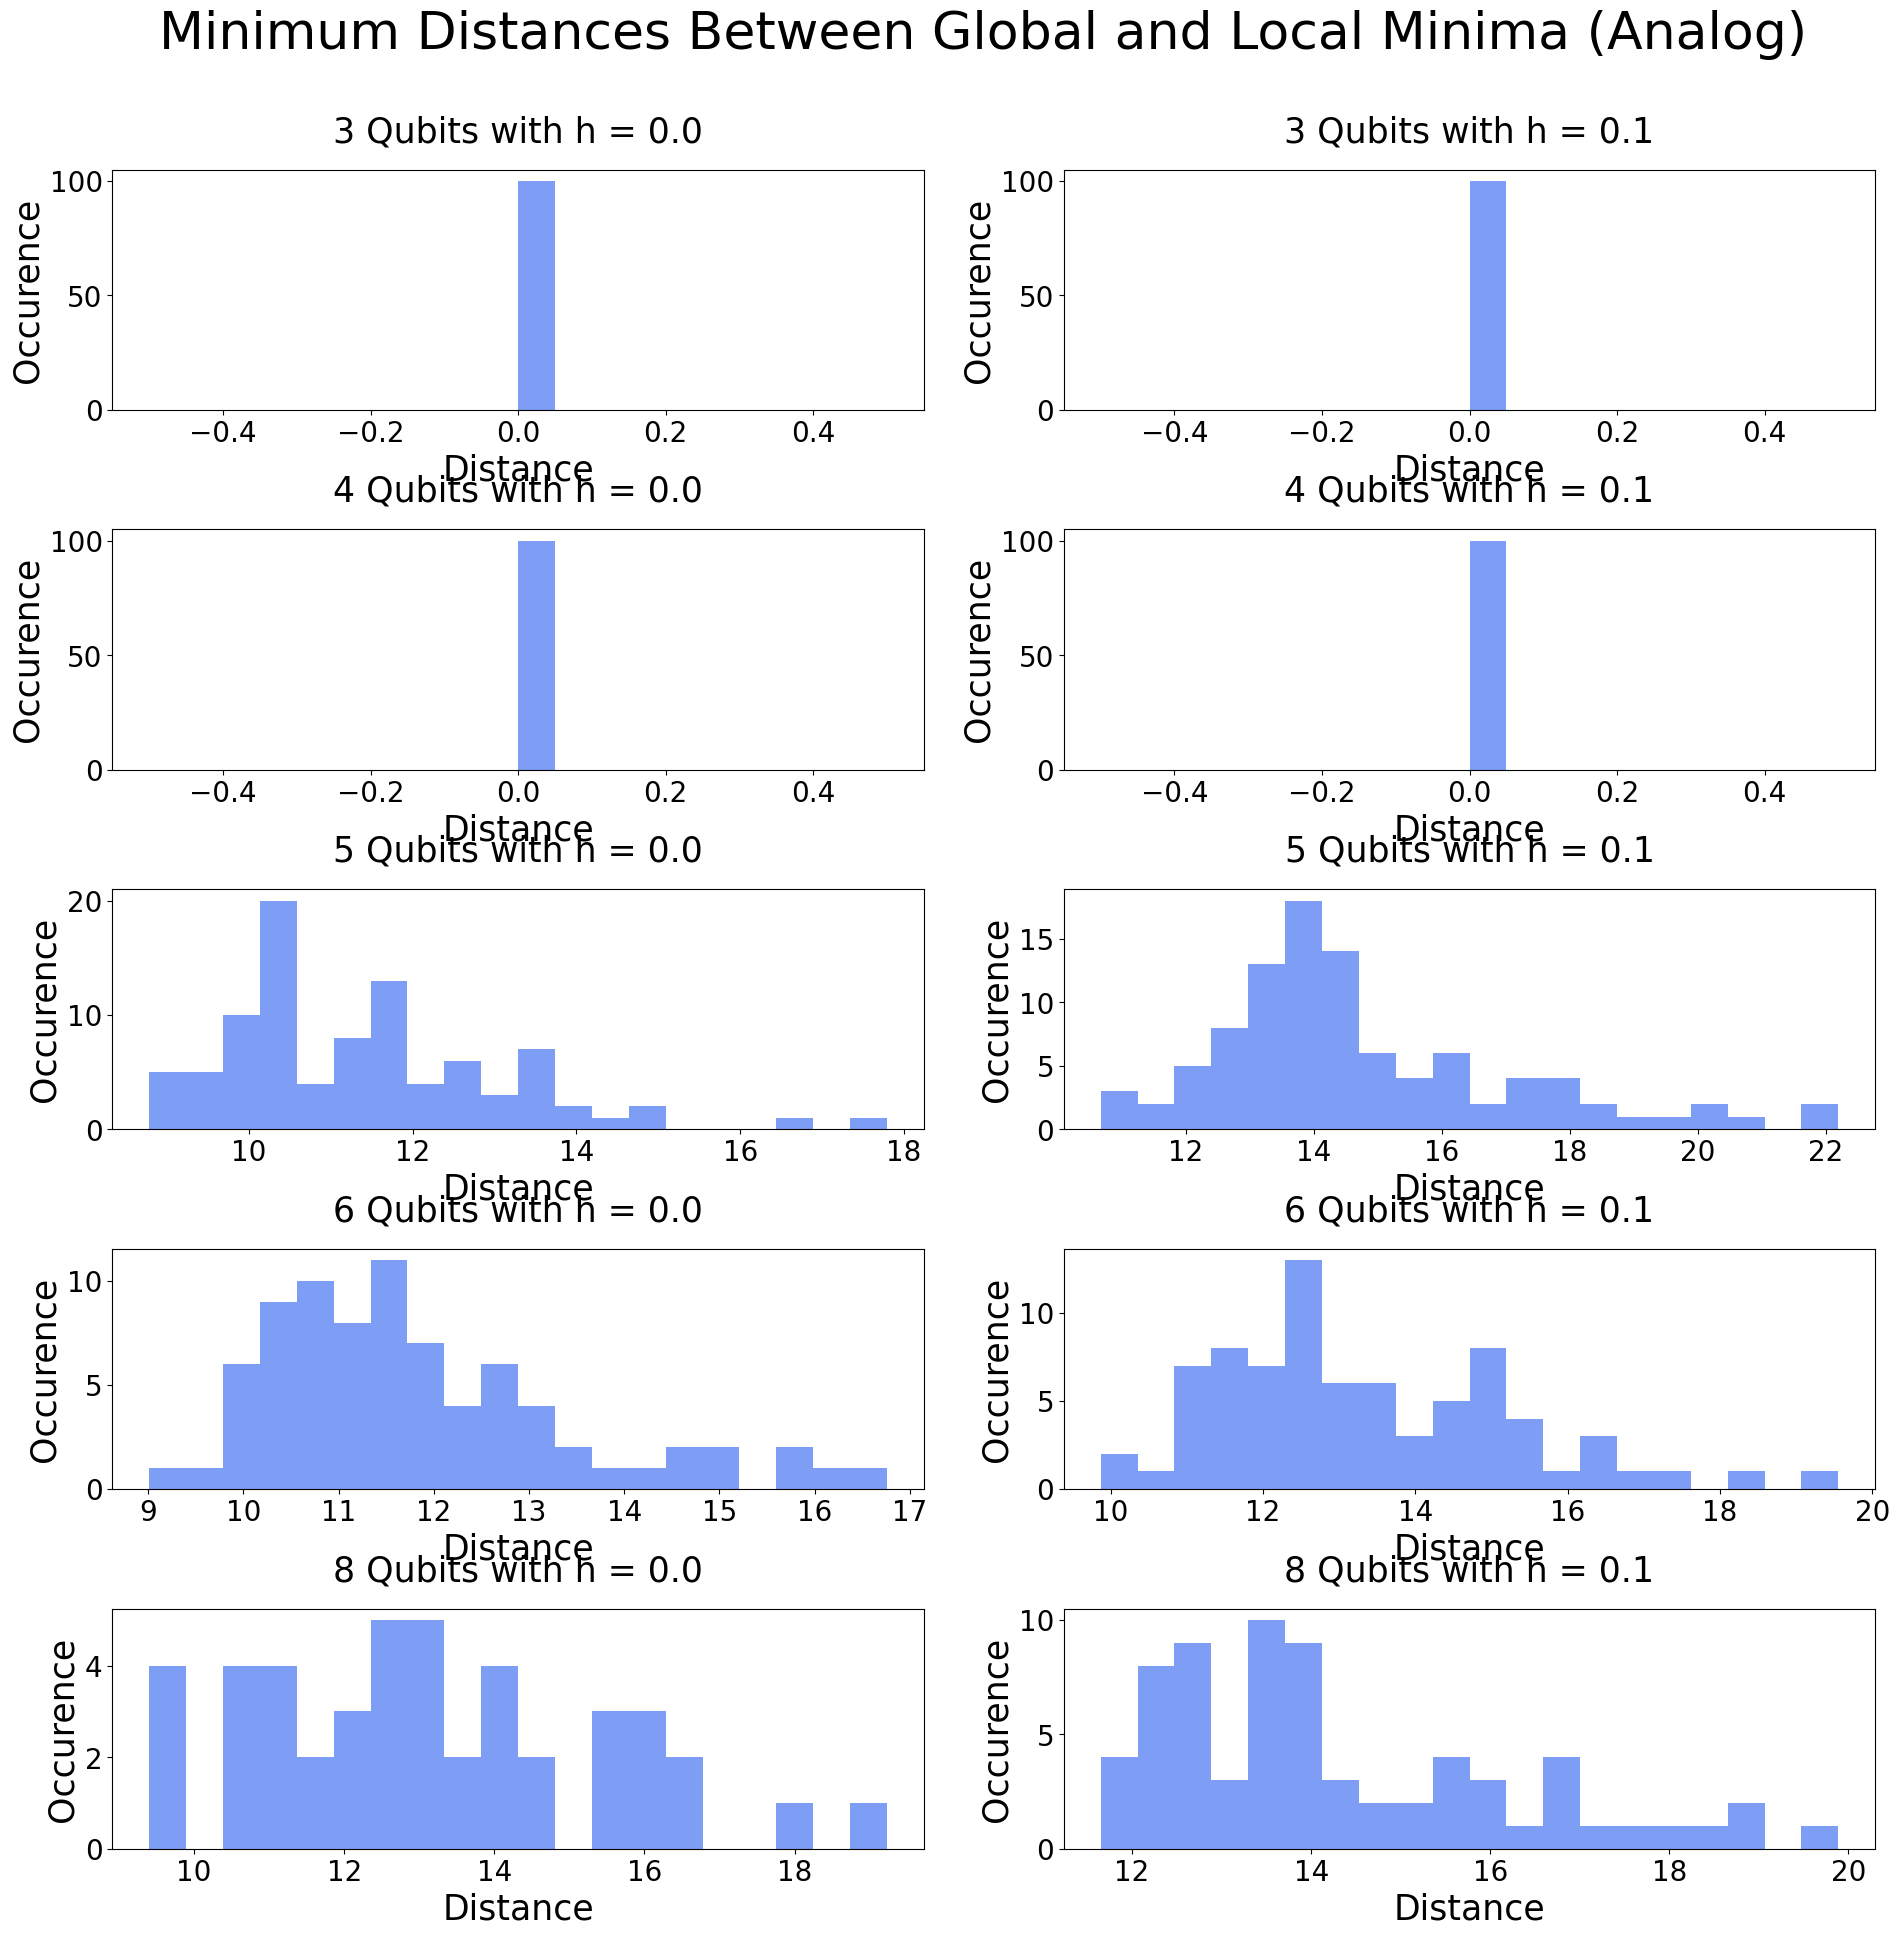

In [92]:
from scipy.spatial.distance import cdist


MOSAIC = """
        AB
        CD
        EF
        GH
        IJ
        """

ax_mapping = {
    '3_0.0': 'A',
    '3_0.1': 'B',
    '4_0.0': 'C',
    '4_0.1': 'D',
    '5_0.0': 'E',
    '5_0.1': 'F',
    '6_0.0': 'G',
    '6_0.1': 'H',
    '8_0.0': 'I',
    '8_0.1': 'J',
    '10_0.0': 'K',
    '10_0.1': 'L',
}


std_min_distances = []
average_min_distances = []
# frequencies = []
qubit_number = []
transverse_fields = []


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(20,20))

fig.tight_layout(pad=7.0)

for problem in vqe_problems:

    n_qubits = problem['qubits']
    h_parameter = problem['transverse_field_coefficient']

    qubit_number.append(n_qubits)
    transverse_fields.append(h_parameter)

    simulation_results = problem['simulation_results']
    final_parameters_split = simulation_results['final_parameters_split']

    # Ground State Data

    # ground_state_para = spectrum_dict['0_excited_state']

    global_minima_final_parameters = final_parameters_split[0]

    # first_excited_state_data = spectrum_dict['1_excited_state']

    if len(final_parameters_split[1:]) > 0:
        local_minima_final_parameters = np.concatenate(final_parameters_split[1:])

    else:
        local_minima_final_parameters = global_minima_final_parameters

    # print(local_minima_final_parameters.shape)
    # print(global_minima_final_parameters.shape)

    distances = cdist(global_minima_final_parameters, local_minima_final_parameters)/(1)

    min_distances = np.min(distances, axis=1)

    average_distances = np.mean(distances, axis=1)
    std_distances = np.std(distances, axis=1)

    average_min_distance = np.mean(min_distances)
    std_min_distance = np.std(min_distances)

    average_min_distances.append(average_min_distance)
    std_min_distances.append(std_min_distance)

    key = f'{n_qubits}_{h_parameter}'
    ax_key = ax_mapping[key]
    # print(key)
    ax = ax_dict[ax_key]


    ax.hist(min_distances, bins = 20, align="mid", color=plt.get_cmap("coolwarm", 7)(1), alpha=0.9)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter} (Digital)", fontsize=title_fontsize, pad=20)
    ax.set_title(f"{n_qubits} Qubits with h = {h_parameter}", fontsize=title_fontsize, pad=20)
    ax.set_xlabel("Distance", fontsize=label_fontsize)
    ax.set_ylabel("Occurence", fontsize=label_fontsize)
    ax.tick_params(labelsize=tick_fontsize)



fig.suptitle('Minimum Distances Between Global and Local Minima (Analog)', fontsize=title_fontsize*1.5)


plt.subplots_adjust(top=0.9)


filename = results_path + 'minimum_distances_between_global_local_minima_histogram.pdf'


plt.savefig(filename, bbox_inches="tight")




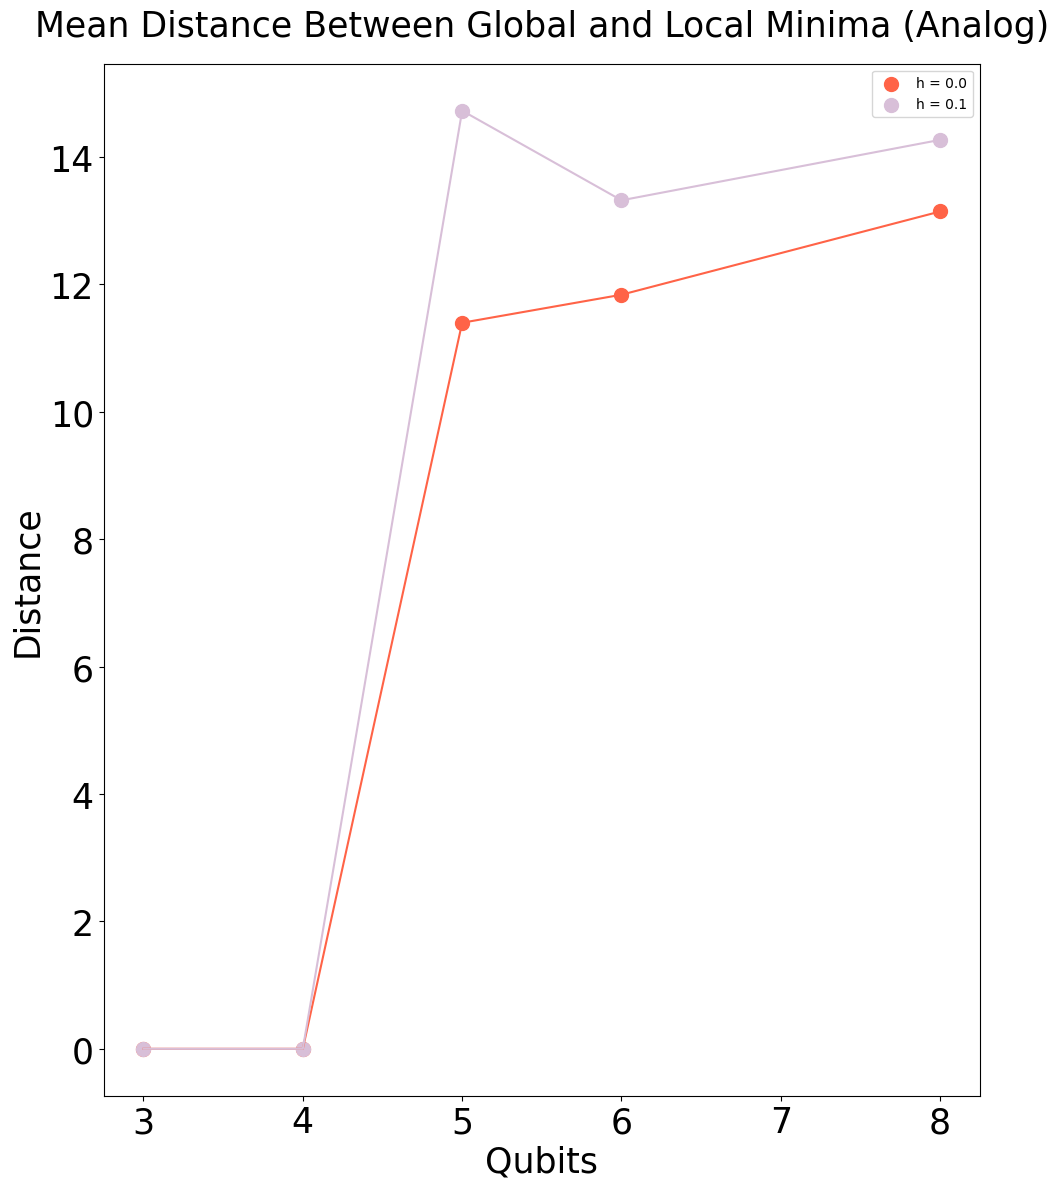

In [93]:
MOSAIC = """
        A
        """


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)
std_min_distances = np.asarray(std_min_distances)
average_min_distances = np.asarray(average_min_distances)

###############################
# Mean and Std plots


fig, ax_dict = plt.subplot_mosaic(MOSAIC, figsize=(10,12))


fig.tight_layout(pad=7.0)


# frequencies = np.asarray(frequencies)/100
transverse_fields = np.asarray(transverse_fields)
qubit_number = np.asarray(qubit_number)

field_filter = np.where(transverse_fields==0.0, True, False)


# colors = np.where(transverse_fields==0.1, 'red', 'blue')

# 0.0 Field

ax_mean = ax_dict['A']

ax_mean.scatter(qubit_number[field_filter], average_min_distances[field_filter], s=100, c='tomato', label = 'h = 0.0')
ax_mean.plot(qubit_number[field_filter], average_min_distances[field_filter], c='tomato')

# 0.1 Field

ax_mean.scatter(qubit_number[~field_filter], average_min_distances[~field_filter], s=100, c='thistle', label = 'h = 0.1')
ax_mean.plot(qubit_number[~field_filter], average_min_distances[~field_filter], c='thistle')

ax_mean.set_ylabel('Distance', fontsize=title_fontsize)
ax_mean.set_xlabel('Qubits', fontsize=title_fontsize)
ax_mean.set_title(f'Mean Distance Between Global and Local Minima (Analog)', fontsize=title_fontsize, pad=20)
# ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
ax_mean.tick_params(labelsize=title_fontsize)

# ax_std = ax_dict['B']


# ax_std.scatter(qubit_number[field_filter], std_min_distances[field_filter], s=100, c='orange', label = 'h = 0.0')
# ax_std.plot(qubit_number[field_filter], std_min_distances[field_filter], c='orange')


# # 0.1 Field

# ax_std.scatter(qubit_number[~field_filter], std_min_distances[~field_filter], s=100, c='red', label = 'h = 0.1')
# ax_std.plot(qubit_number[~field_filter], std_min_distances[~field_filter], c='red')

# ax_std.set_ylabel('Distance', fontsize=label_fontsize)
# ax_std.set_xlabel('Qubits', fontsize=label_fontsize)
# ax_std.set_title(f'Std of Distance Between Global and Local Minima for 150 epochs with lr = 0.08 (Analog)', fontsize=label_fontsize, pad=20)
# # ax_mean.yaxis.set_major_formatter(PercentFormatter(1))
# ax_std.tick_params(labelsize=tick_fontsize)


# ax_std.legend()
ax_mean.legend()

plt.tight_layout()


filename = results_path + 'minimum_distances_between_global_local_minima_statistics.pdf'


plt.savefig(filename, bbox_inches="tight")


In [94]:
LOSS_LANDSCAPES_RESULTS_PATH = '/Users/jorgegarciaponce/Research/Yelin/Perceptron/CumulantNODEs/Loss_landscapes/Results/Analog_Results.pickle'

import pickle

with open(LOSS_LANDSCAPES_RESULTS_PATH, 'wb') as f:
    pickle.dump(vqe_problems, f)